In [3]:
# installer colored
pip install colored

Note: you may need to restart the kernel to use updated packages.


In [4]:
# installer termcolor
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [359]:
from pymongo import MongoClient
from datetime import datetime
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import json
from typing import List, Union 

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from termcolor import colored

In [394]:
class DataExplorerFond:
    def __init__(self, df):
        self.df = df
        
    """
    Initialise une instance de DataExplorerFond avec un DataFrame Pandas en entrée.

    Args: data (pd.DataFrame): Les données à explorer.
    """
        
    def doublons(self):
        """
        Afficher les informations indiquant les lignes en double.
        
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
            
        Returns:
        -----------------
        Les doublons du dataframe
        """ 
        
        print("Les doublons dans df_churn:", len(self.df[self.df.duplicated()]))
        
    def unique_multi_cols(self):
        
        """
        Afficher les informations concernant les valeurs uniques pour chaque colonnes
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
            
        Returns:
        -----------------
        Les valeurs uniques pour chaque colonnes
        """ 
        
        for col in list(self.df.columns):
            
            pct_nan = (self.df[col].isna().sum()/self.df[col].shape[0])
            unique = self.df[col].unique()
            nunique = self.df[col].nunique()
          
            print('')
            print(colored(col, 'red'))
            print('') 
            print((f'Le pourcentage NaN : {pct_nan*100}%'))
            print(f'Nombre de valeurs unique : {nunique}')
            print('')
            print(unique)
            print('')
            print('---------------------------------------------------------------------------------------')
     
    
    # Plot NaN pourcentage
    def plot_pourcentage_NaN_features(self):
        
        """
        Afficher les informartions concernant les valeurs manquantes des rows
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
            
        Returns:
        -----------------
        tabulates les valeurs manquantes des rows
        """
        
        plt.figure(figsize=(20,18))
        plt.title('Le pourcentage de valeurs manquantes pour les features', size=20)
        plt.plot((self.df.isna().sum()/self.df.shape[0]*100).sort_values(ascending=True))
        plt.xlabel('Features dataset', fontsize=18)
        plt.ylabel('Pourcentage NaN dans features', fontsize=18)
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
        plt.show()        
        pct_dataset = pd.DataFrame((self.df.isna().sum()/self.df.shape[0]*100).sort_values(ascending=False))
        pct_dataset = pct_dataset.rename(columns={0:'Pct_NaN_colonne'})
        pct_dataset = pct_dataset.style.background_gradient(cmap='YlOrRd')
        return

In [365]:
class UnivariateDataExplorer:
    
    
    def __init__(self, df: pd.DataFrame):
        """
        Initialise une instance de UnivariateDataExplorer avec un DataFrame Pandas en entrée.

        Args:
            data (pd.DataFrame): Les données à explorer.
        """
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Les données doivent être un DataFrame Pandas")

        self.df = df
        
    
        
    
    def categ_pie_plot(self, col: str):
        
        """
        Afficher Pie plot  
    
        Parameters:
        -----------------
        df (Dataframe) : dataframe analysis 
        col (object): 'col' de type object   
        Returns:
        -----------------
        plot pie
        """
        plt.figure(figsize=(12,8))
        
        self.df[col].value_counts(normalize=True).head(8).plot(kind='pie',subplots=True, shadow = True,autopct='%1.1f%%',
                                    textprops={'fontsize': 17} )
        plt.title(f'Répartition des {col} les plus représentées ', size=25)
        plt.ylabel('', fontsize=17)
        plt.xlabel(f'{col}', fontsize=17)
        plt.xticks(fontsize=17)
        plt.show()
    
    def categ_bar_plot(self, col: str):
        
        """
        Afficher barplot  
    
        Parameters:
        -----------------
        self (Dataframe) : dataframe analysis 
        col (object): 'col' de type object   
        Returns:
        -----------------
        plot barplot
        """
        
        plt.figure(figsize=(12,8))
        self.df[col].value_counts().plot( kind='bar', color='darkred')
        plt.title(f'Les {col} les plus représentés', size=25)
        plt.ylabel('Frequency', fontsize=17)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel(f'{col}', fontsize=17)
        plt.show()
        print('')
        print('')
        
    
    def num_hist_plot(self, col: str ):
        
        """
        Afficher histogramme 
    
        Parameters:
        -----------------
        self (Dataframe) : dataframe analysis 
        col (float, int): 'col' de type float ou int
        Returns:
        -----------------
        plot histogramme
        """
        
        sns.set_style('darkgrid')
        sns.set_color_codes(palette='dark')
        plt.figure(figsize=(12,8))
        sns.histplot(self.df[col],color='red',kde=True)
        plt.title(f'Histogramme de {col}', size=25)
        plt.ylabel('Frequency',fontsize=17)
        plt.xlabel(f'{col}',fontsize=17)
        plt.show()
        print('')
        print('')
        
    def __repr__(self):
        
        return str(self.__dict__)

        
class BivariateDataExplorer:
    
    
    def __init__(self, data: pd.DataFrame):
        self.df = data
    
    """
    Initialise une instance de BivariateDataExplorer avec un DataFrame Pandas en entrée.

    Args: data (pd.DataFrame): Les données à explorer.
    """
        
    def numVSnum_heatmap_corr(self):
        
        plt.figure(figsize=(16,14))
        sns.heatmap(self.df.corr(),annot=True , cmap='GnBu')
        plt.title('Matrice corrélation')
        
    
    # fonction afficher relation entre variable numérique et object
    def categVSnum_boxplot(self, var_cat: str, var_num: str):
        
        """
        Afficher boxplot entre une variable catégorielle et variable numérique
    
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
        var_cat (object) : 'col' de type object 
        var_num (float, int) : 'col' de type float, int    
        Returns:
        -----------------
        plot boxplot
        """
        
        meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
        plt.figure(figsize=(16,12))
        plt.title(f"Boxplot entre {var_cat} et {var_num}", size=22)
        sns.boxplot(x=self.df[var_cat], y=self.df[var_num], showmeans=True, meanprops=meanprops,data=self.df)
        plt.xticks(fontsize=9)
        
    
    def categVScateg_countplot(self, var_cat1: str, var_cat_2: str):
        
        """
        Afficher countplot entre une variable catégorielle et variable catégorielle qui prend le nom de la colonne pour l’encodage des couleurs (hue)
    
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
        var_cat1 (object) : 'col' de type object 
        var_cat_2 (object) : 'col' de type object à mettre dans paramètre hue    
        Returns:
        -----------------
        plot countplot
        """
        
        
        plt.figure(figsize=(16,14))
        plt.title(f'Countplot entre {var_cat1} et {var_cat_2}',size=22)
        sns.countplot(x=var_cat1,hue=var_cat_2, data=self.df)
        plt.legend(loc='best')
        plt.xticks(fontsize=9)
        
    def __repr__(self):
        return str(self.__dict__)
    

    

    
class DistributionDataExplorer:
    
    
    def __init__(self, data: pd.DataFrame):
        self.df = data 
    """
    Initialise une instance de DistributionDataExplore avec un DataFrame Pandas en entrée.

    Args: data (pd.DataFrame): Les données à explorer.
    """
        
    
    def Diagnostic_plot(self, variable: str):
        
        """
        Afficher diagnostic_plots afin de vérifier diagnostic des distributions 
        voir les outliers et normalités
    
        Parameters:
        -----------------
        self (DataFrame) : Dataframe analysis
        variable (series) : Colonne du dataframe
            
        Returns:
        -----------------
        plot diagnostic et test normalité 
        """
        
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(self.df[variable], bins=30)
        plt.title('Histogram')
    
        # Q-Q plot
        plt.subplot(1, 3, 2)
        stats.probplot(self.df[variable], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')
    
        # boxplot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=self.df[variable])
        plt.title('Boxplot')
    
        print('Test Shapiro')
        data = self.df[variable].values
        stat, p = shapiro(data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
             print('Probablement Gaussien ')
        else:
             print('Probablement pas  Gaussien ')
                
        print('Test normaltest')        
        data = self.df[variable].values
        stat, p = normaltest(data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probablement Gaussien ')
        else:
            print('Probablement pas  Gaussien ')


        plt.show()

# 1) Connexion et insérer des données dans MongoDB

In [8]:
# Connect
client = MongoClient("mongodb://mongo:27017")

# Connect to database
db = client['DB_TEST']

coll = db['Churn_collection']


# read et loads chaques lignes pour inserer dans database (DB_TEST) et collection (col_restaurants)

json_file_path = "Bank Customer Churn Prediction2.json"

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

# insérer les données 
coll.insert_many(contents)

# 2) connection et extraction churn collection

In [340]:
import pymongo
import json
client = MongoClient("mongodb://mongo:27017")
# Connect to database DB_TEST
db = client['DB_TEST']
# la Churn_collection
coll = db['Churn_collection']
# utiliser methode find pour récupérer les données churn
cursor = coll.find()
cursor

In [12]:
pipeline = [
  #Stage 1: Trouver les documents contenant les clients en France 
  {
    "$match": { "country": "France"}
  },
  # Stage 2: Trier les  credit_score (ASCENDING)
  {
    "$sort": {"credit_score": pymongo.ASCENDING }
  }
]

#Transformer pipeline en dataframe pandas 
results = coll.aggregate(pipeline)
results_pipe = pd.DataFrame(list(results))
results_pipe.tail()

,_id,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5009,640894efdb2eeb47f5c4083d,15682868,850,France,Female,40,9,99816.46,1,1,1,163989.66,1
5010,640894efdb2eeb47f5c40873,15709256,850,France,Female,28,9,0.00,2,1,1,164864.67,0
5011,640894efdb2eeb47f5c408de,15730579,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
5012,640894efdb2eeb47f5c409d1,15647800,850,France,Female,34,6,101266.51,1,1,0,33501.98,0
5013,640894efdb2eeb47f5c409e3,15798615,850,France,Female,47,9,137301.87,1,1,0,44351.77,0


# 3) Data exploration 

In [341]:
import pandas as pd
import numpy as np

#Création d'un dataframe
df_original = pd.DataFrame(list(cursor))

In [342]:
# voir df
df_churn = df_original.copy()

In [348]:
# voir df first row
df_churn.head(1)

,_id,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,640894efdb2eeb47f5c3e306,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [346]:
# Vérifier les dimensions
print("Les dimensions du df_churn:",df_churn.shape)

Les dimensions du df_churn: (10000, 13)


In [347]:
# voir les valeurs manquantes 
df_churn.isnull().sum()

_id                 0
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [381]:
# voir types des colonnes
df_churn.dtypes

_id                  object
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [379]:
# voir describe
df_churn.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [391]:
# instancier DataExplorerFond
explorer_fond = DataExplorerFond(df_churn)
# Vérification des doublons 
explorer_fond.doublons()

Les doublons dans df_churn: 0


In [392]:
#vérifier les valeurs uniques 
explorer_fond.unique_multi_cols()


_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 10000

[ObjectId('640894efdb2eeb47f5c3e306') ObjectId('640894efdb2eeb47f5c3e307')
 ObjectId('640894efdb2eeb47f5c3e308') ...
 ObjectId('640894efdb2eeb47f5c40a13') ObjectId('640894efdb2eeb47f5c40a14')
 ObjectId('640894efdb2eeb47f5c40a15')]

---------------------------------------------------------------------------------------

customer_id

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 10000

[15634602 15647311 15619304 ... 15584532 15682355 15628319]

---------------------------------------------------------------------------------------

credit_score

Le pourcentage NaN : 0.0%
Nombre de valeurs unique : 460

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 4

# Analyse univariée

In [319]:
# supprimer colonnes '_id', 'customer_id'
df_churn = df_churn.drop(columns=['_id', 'customer_id'])

# Création listes 'object', 'int64'
li_number = list(df_churn.select_dtypes(include=['number']))
li_cat = list(df_churn.select_dtypes(exclude=['number']))

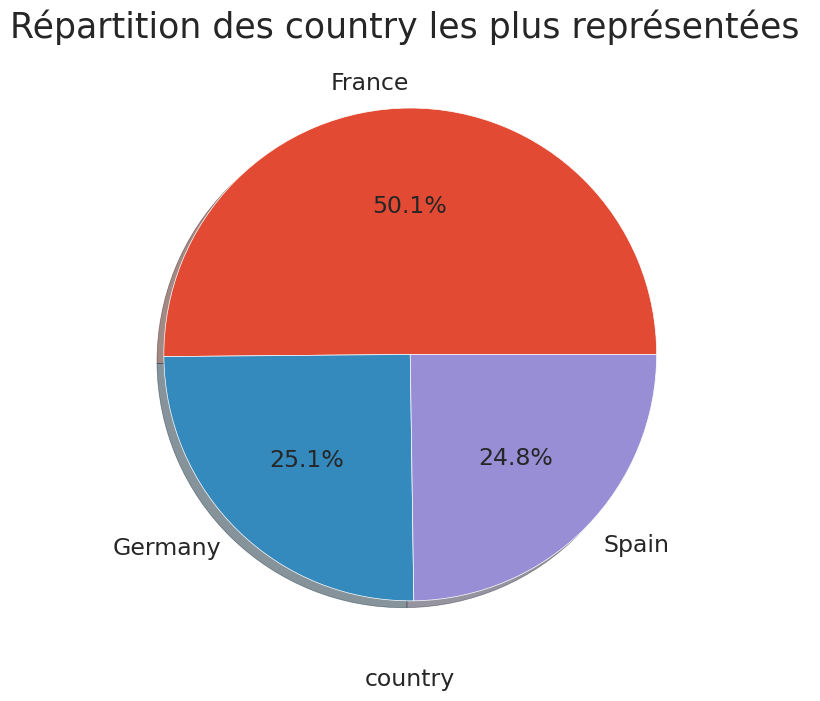

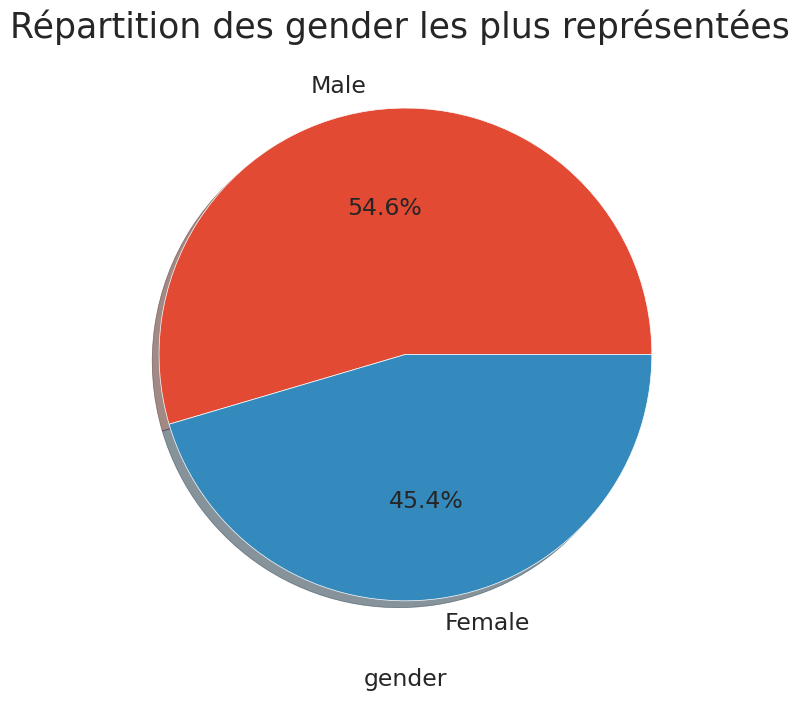

In [320]:
# instancier class UnivariateDataExplorer
Univariate_viz = UnivariateDataExplorer(df_churn)

# afficher les variables objects avec plot cammenbert 
for col in li_cat:
    Univariate_viz.categ_pie_plot(col)

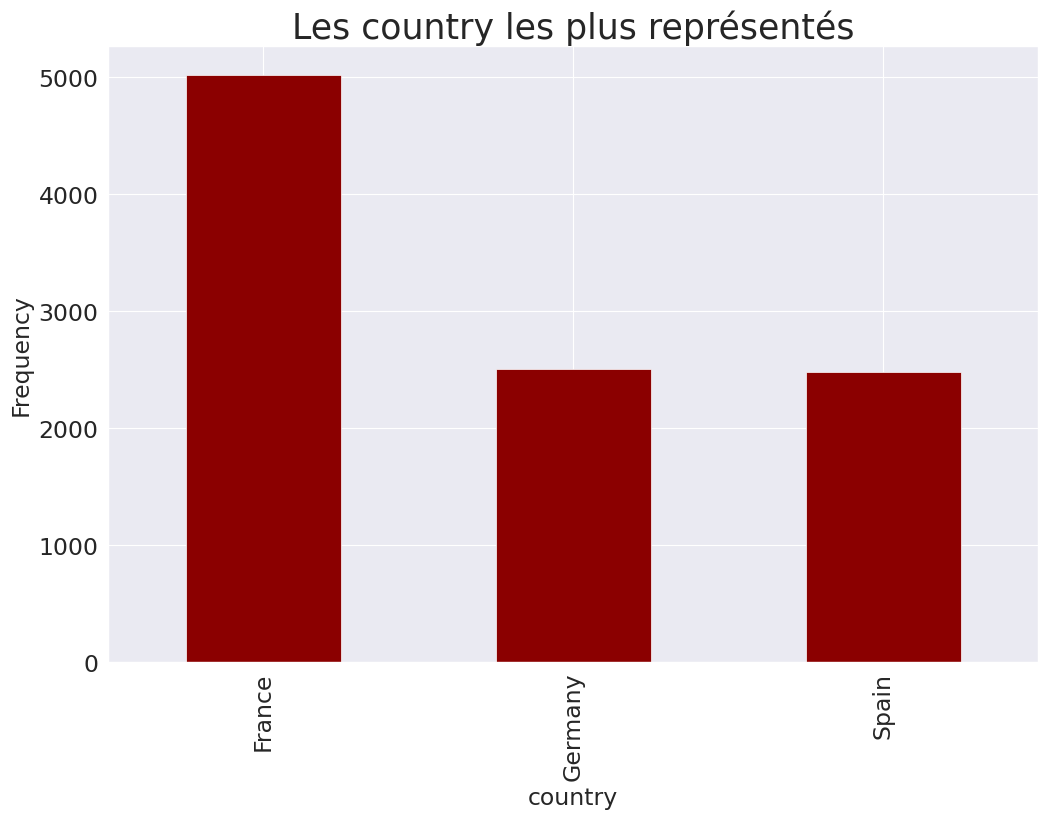

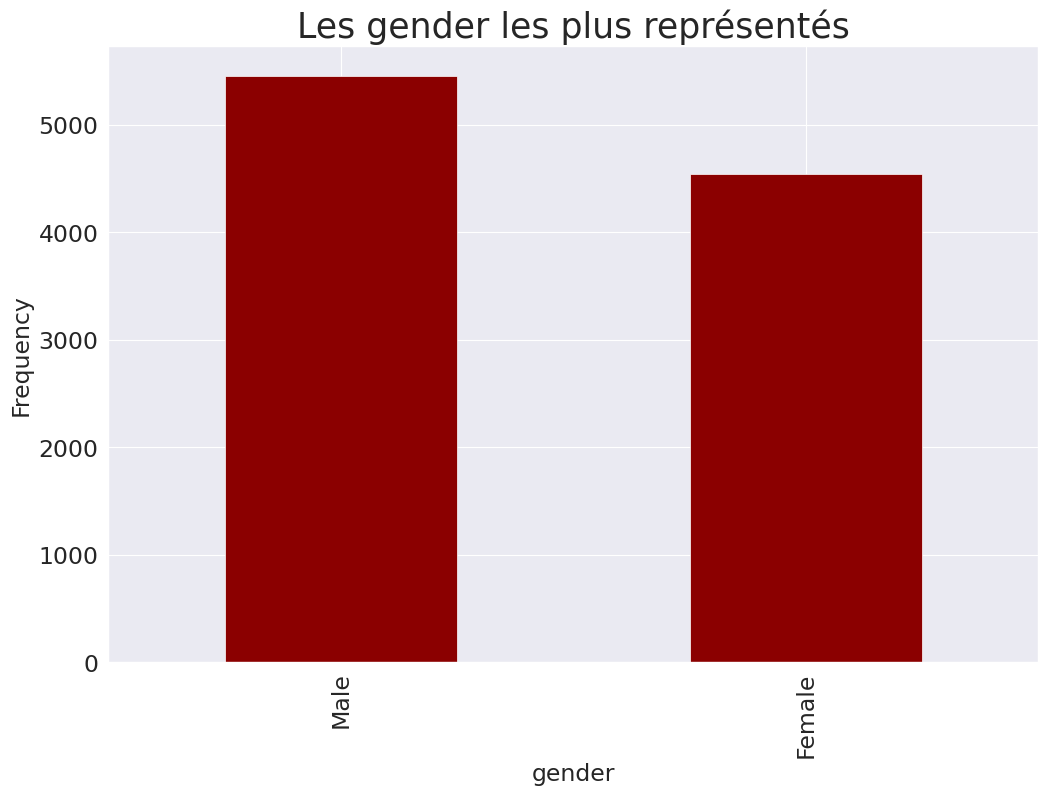

In [321]:
# afficher les variables objects avec barplot
for col in li_cat:
    Univariate_viz.categ_bar_plot(col)

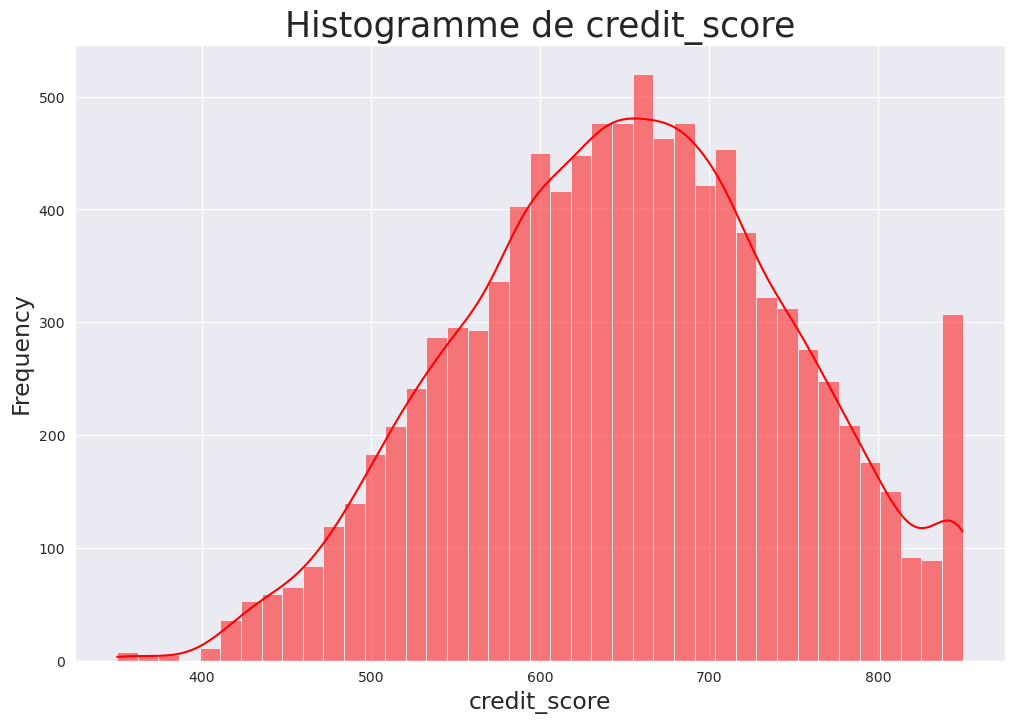

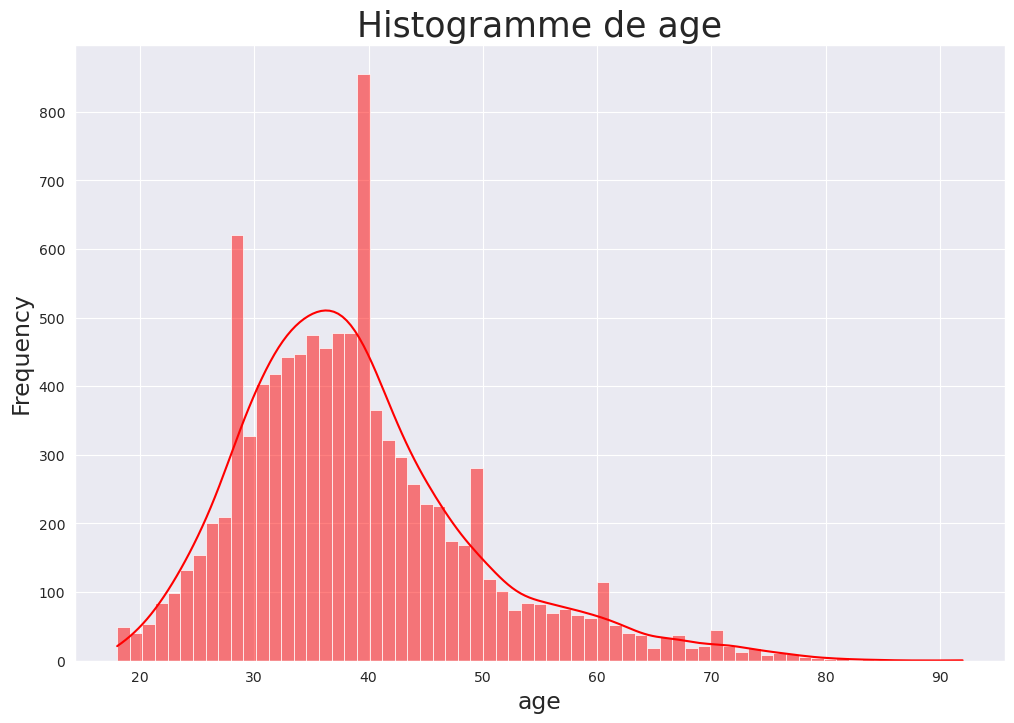

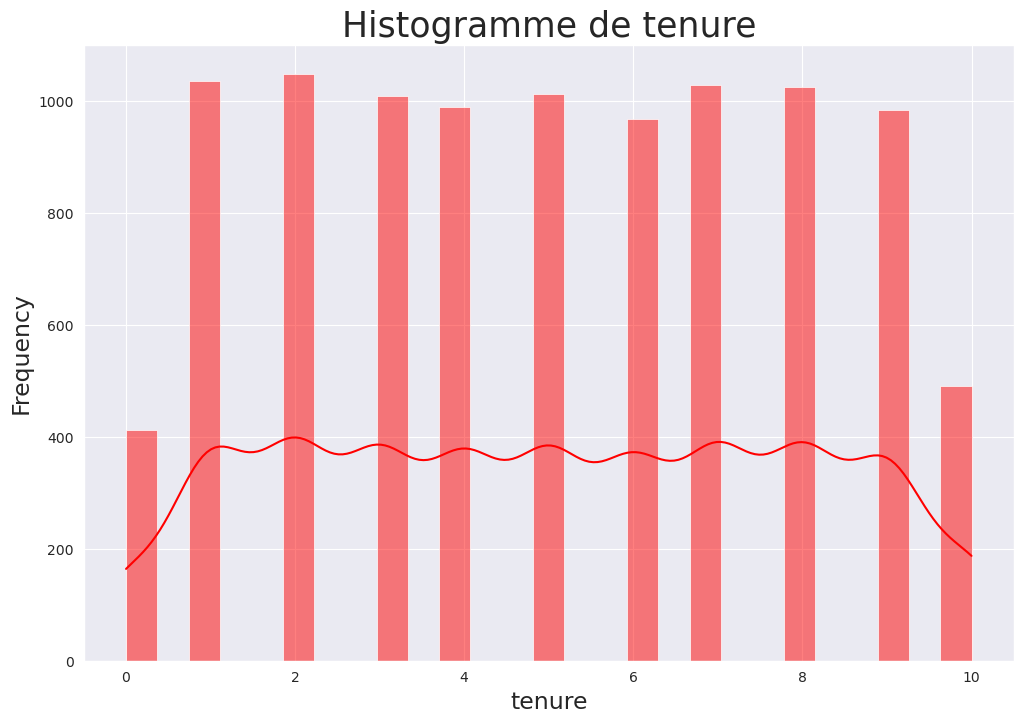

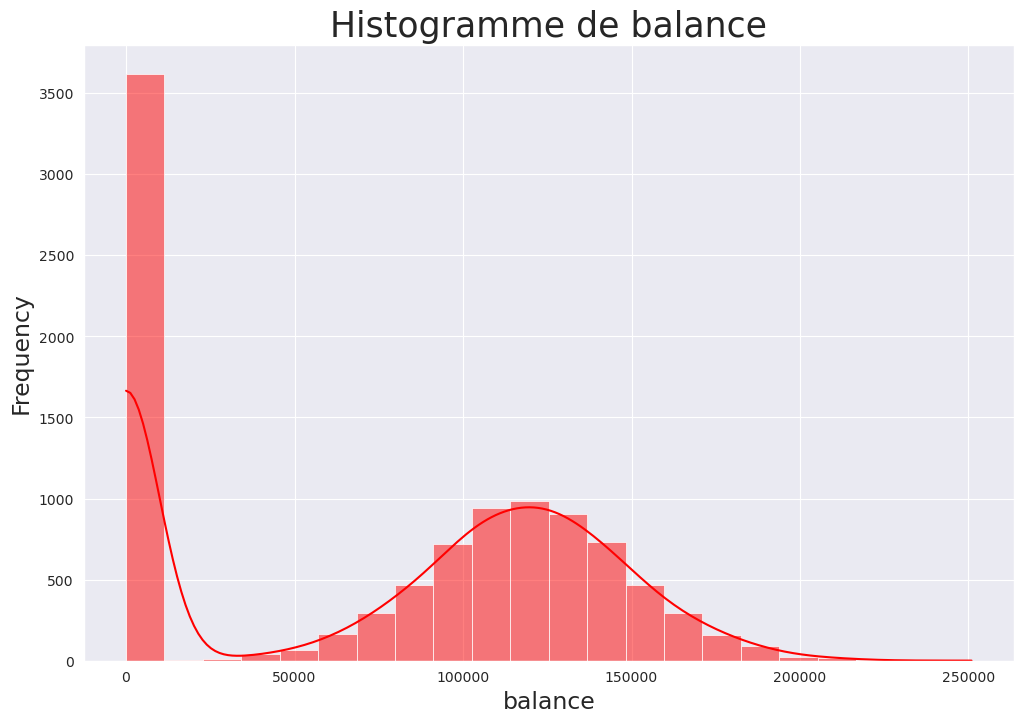

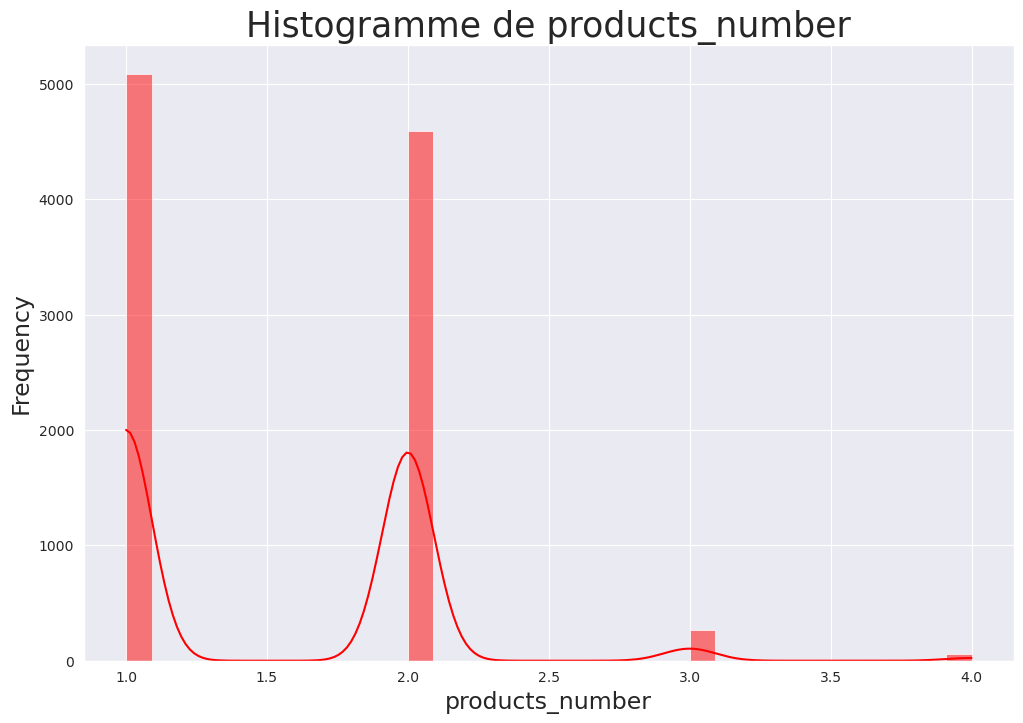

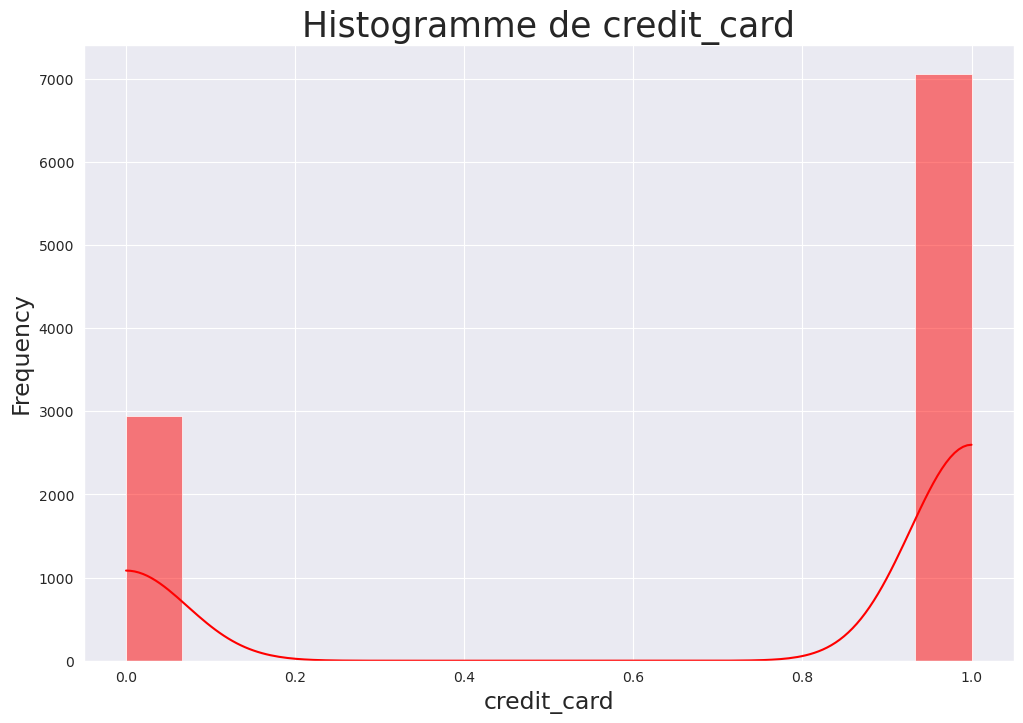

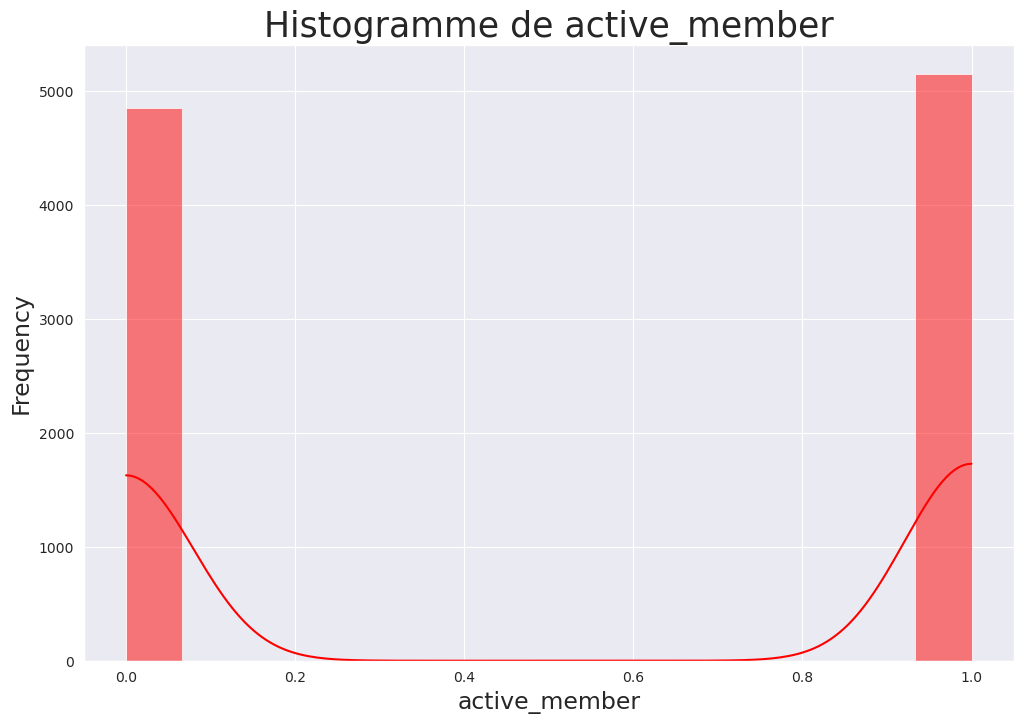

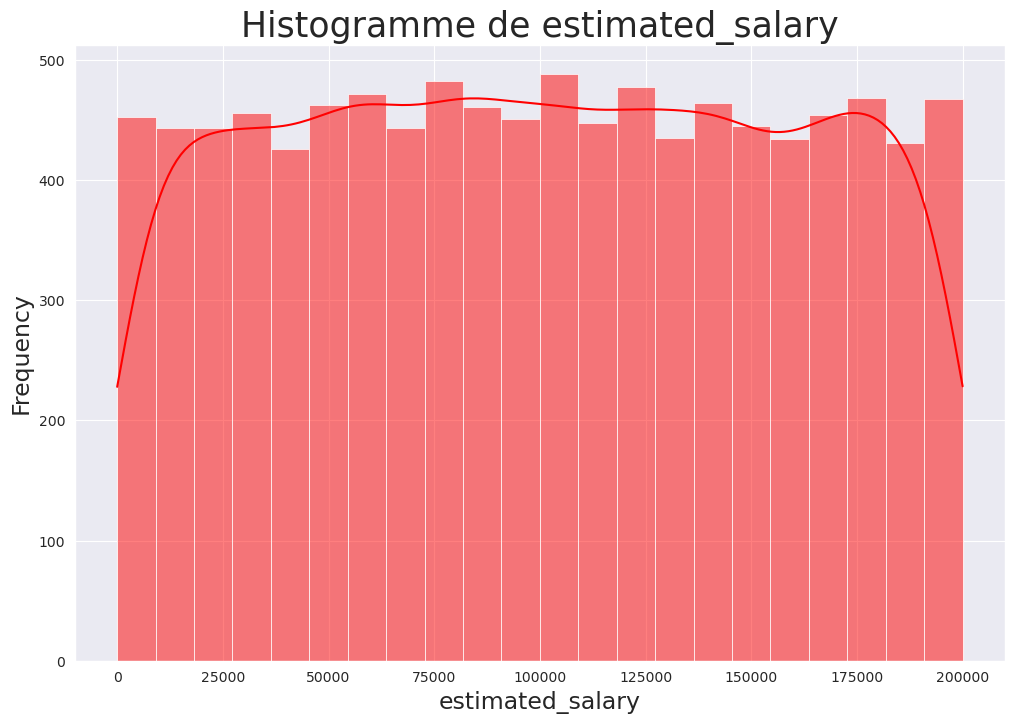

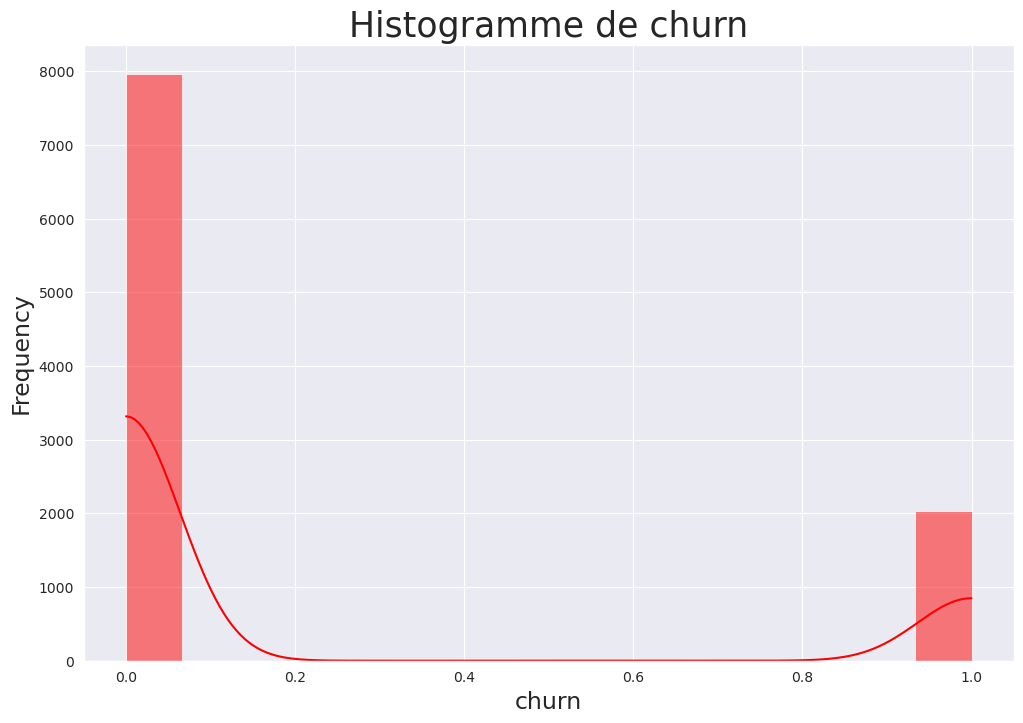

In [322]:
# afficher les variables numériques avec histplot
for col in li_number:
    Univariate_viz.num_hist_plot(col)

CREDIT_SCORE

Test Shapiro
stat=0.994, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=132.828, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


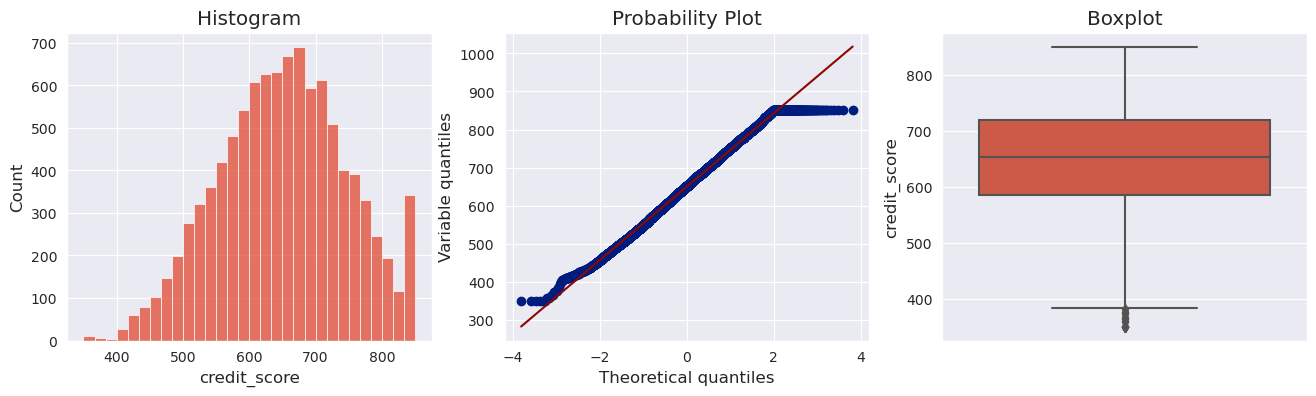


AGE

Test Shapiro
stat=0.944, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=1507.791, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


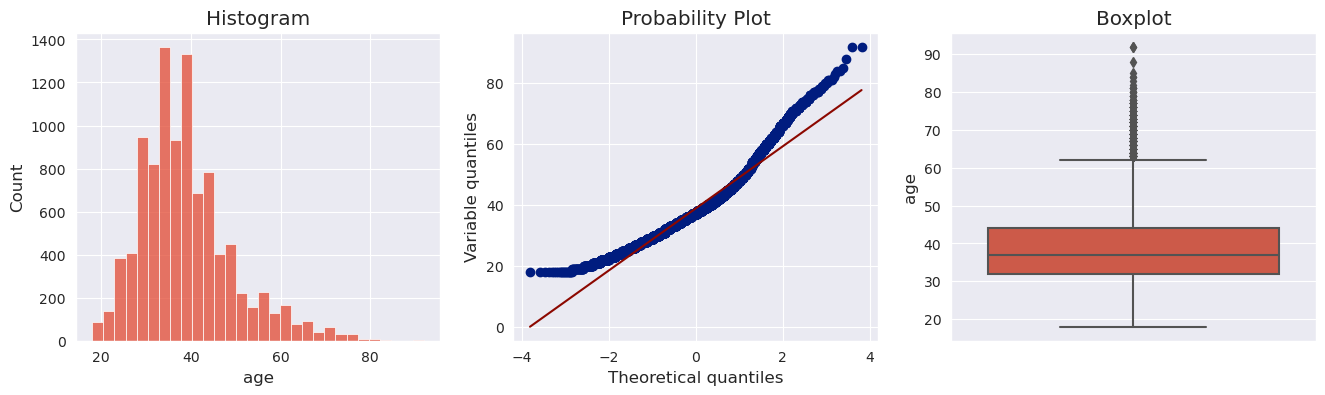


TENURE

Test Shapiro
stat=0.949, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=6481.918, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


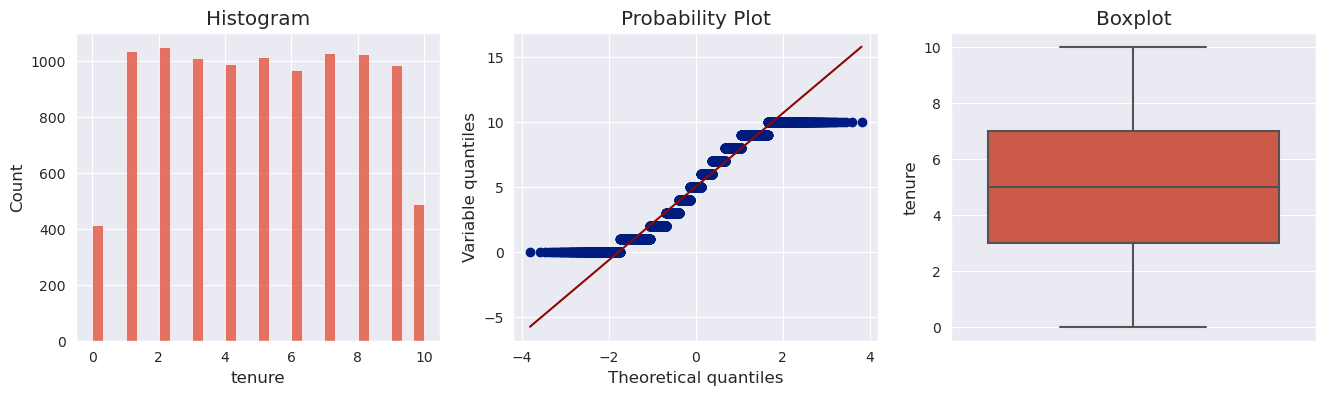


BALANCE

Test Shapiro
stat=0.846, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=62973.390, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


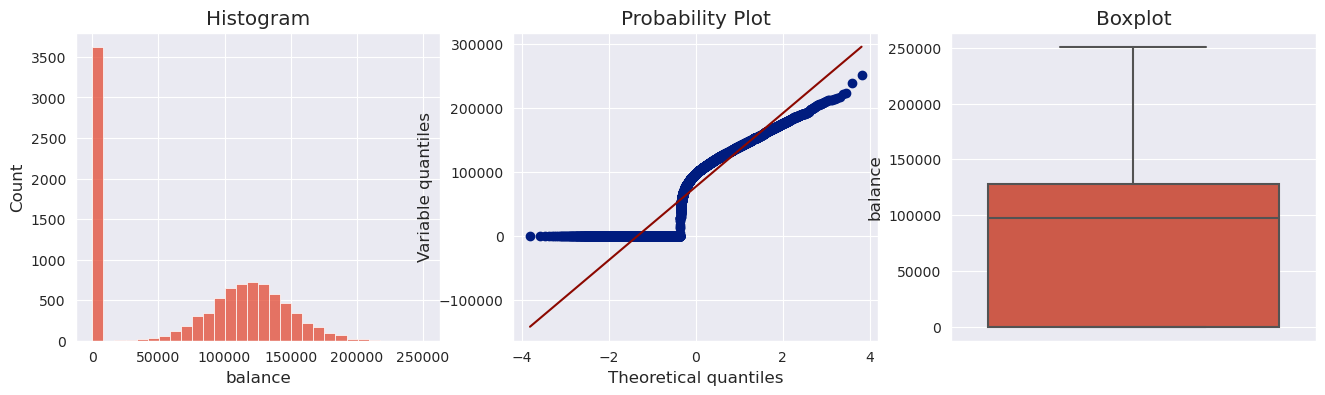


PRODUCTS_NUMBER

Test Shapiro
stat=0.706, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=832.989, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


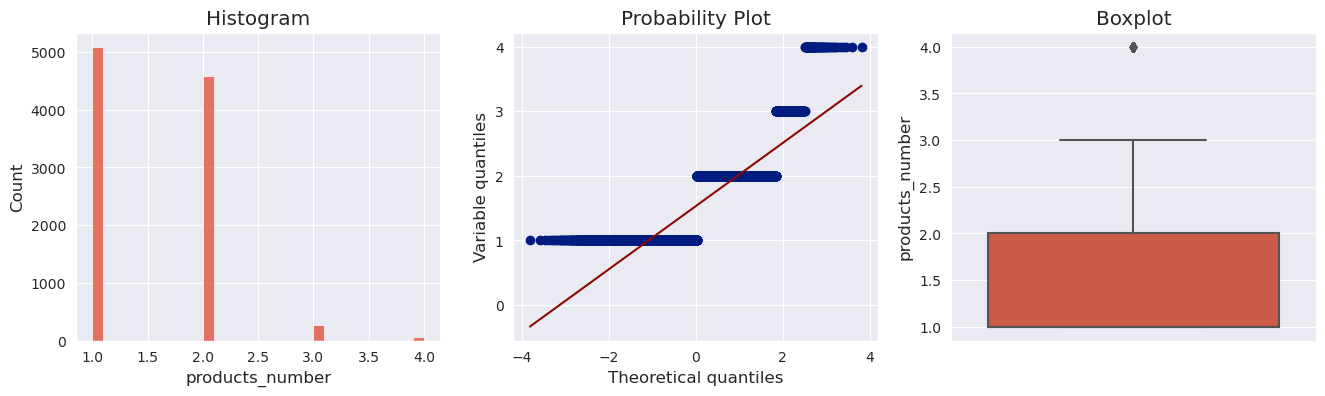


CREDIT_CARD

Test Shapiro
stat=0.572, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=8759.537, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


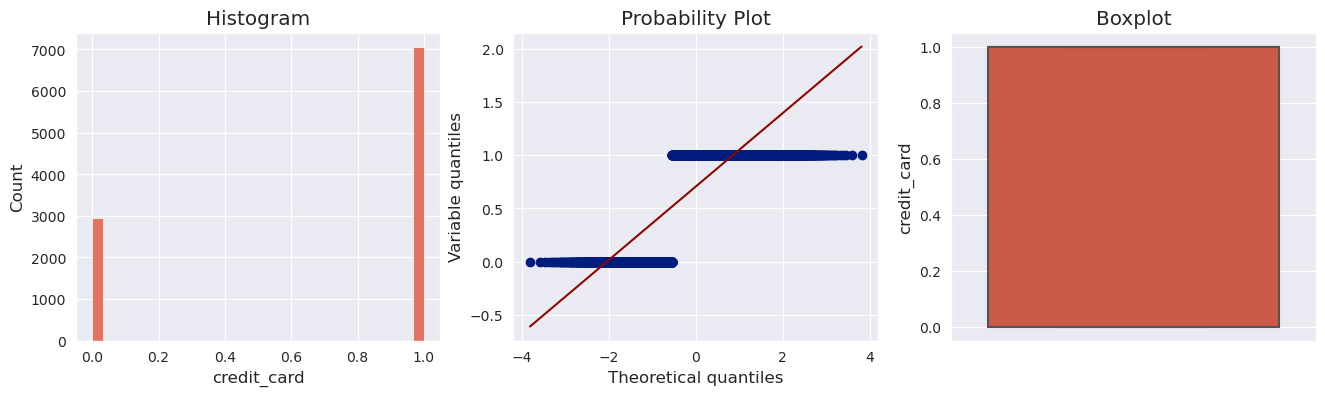


ACTIVE_MEMBER

Test Shapiro
stat=0.636, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=34476.145, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


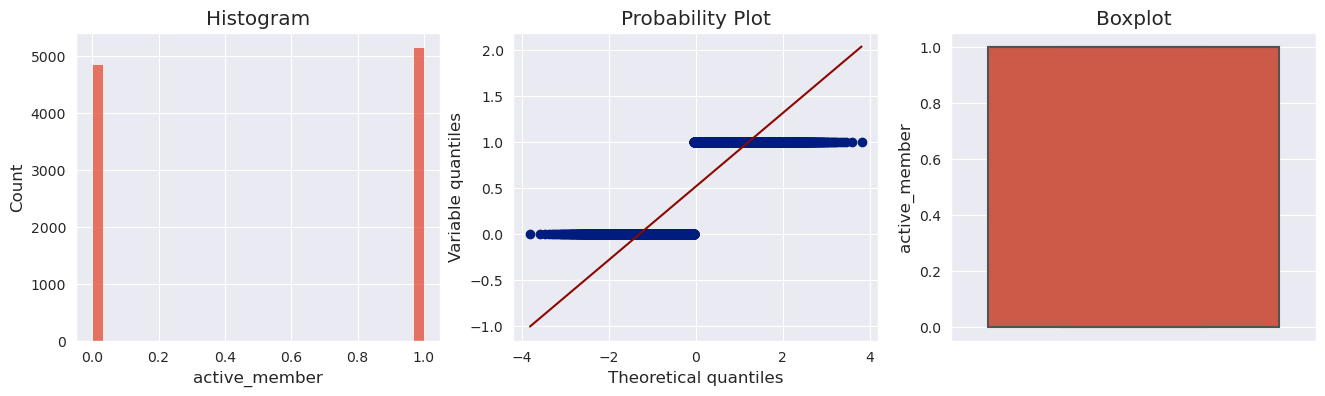


ESTIMATED_SALARY

Test Shapiro
stat=0.957, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=7397.150, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


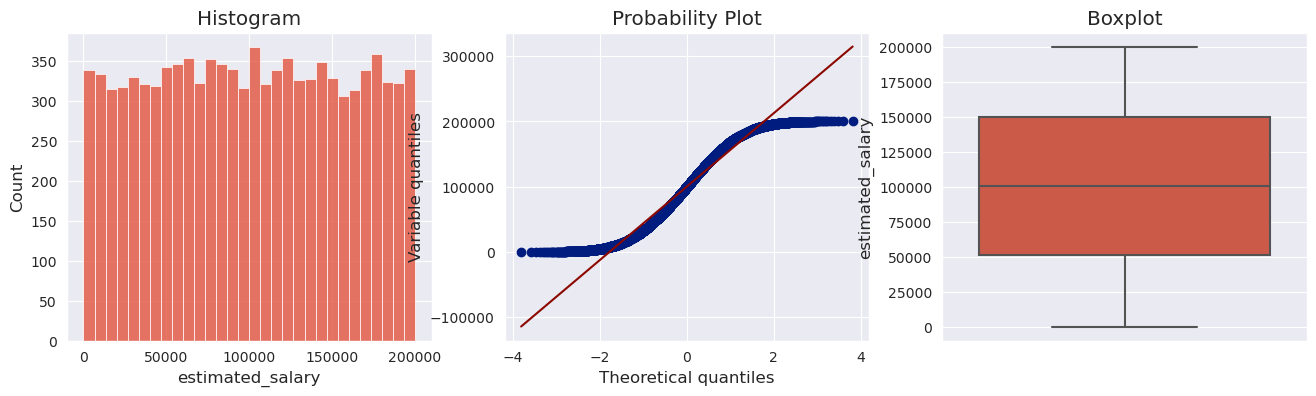


CHURN

Test Shapiro
stat=0.494, p=0.000
Probablement pas  Gaussien 
Test normaltest
stat=2043.955, p=0.000
Probablement pas  Gaussien 


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


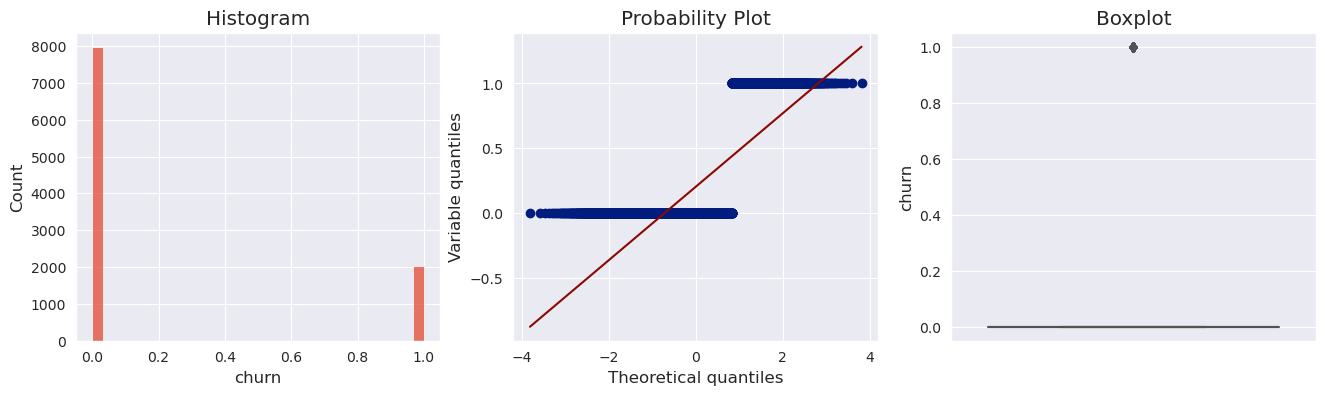

In [363]:
# instancier class DistributionDataExplorer
explorer_outliers_norm = DistributionDataExplorer(df_churn)

#itération pour afficher diagnostic des distributions pour chaque indicateur
#voir les outliers et normalités 
for num in li_number:
  print(colored(num.upper(), 'red'))
  print('')
  explorer_outliers_norm.Diagnostic_plot(num)
  print('')

# Analyse bivariée

/tmp/ipykernel_9116/3325830044.py:71: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(),annot=True , cmap='GnBu')


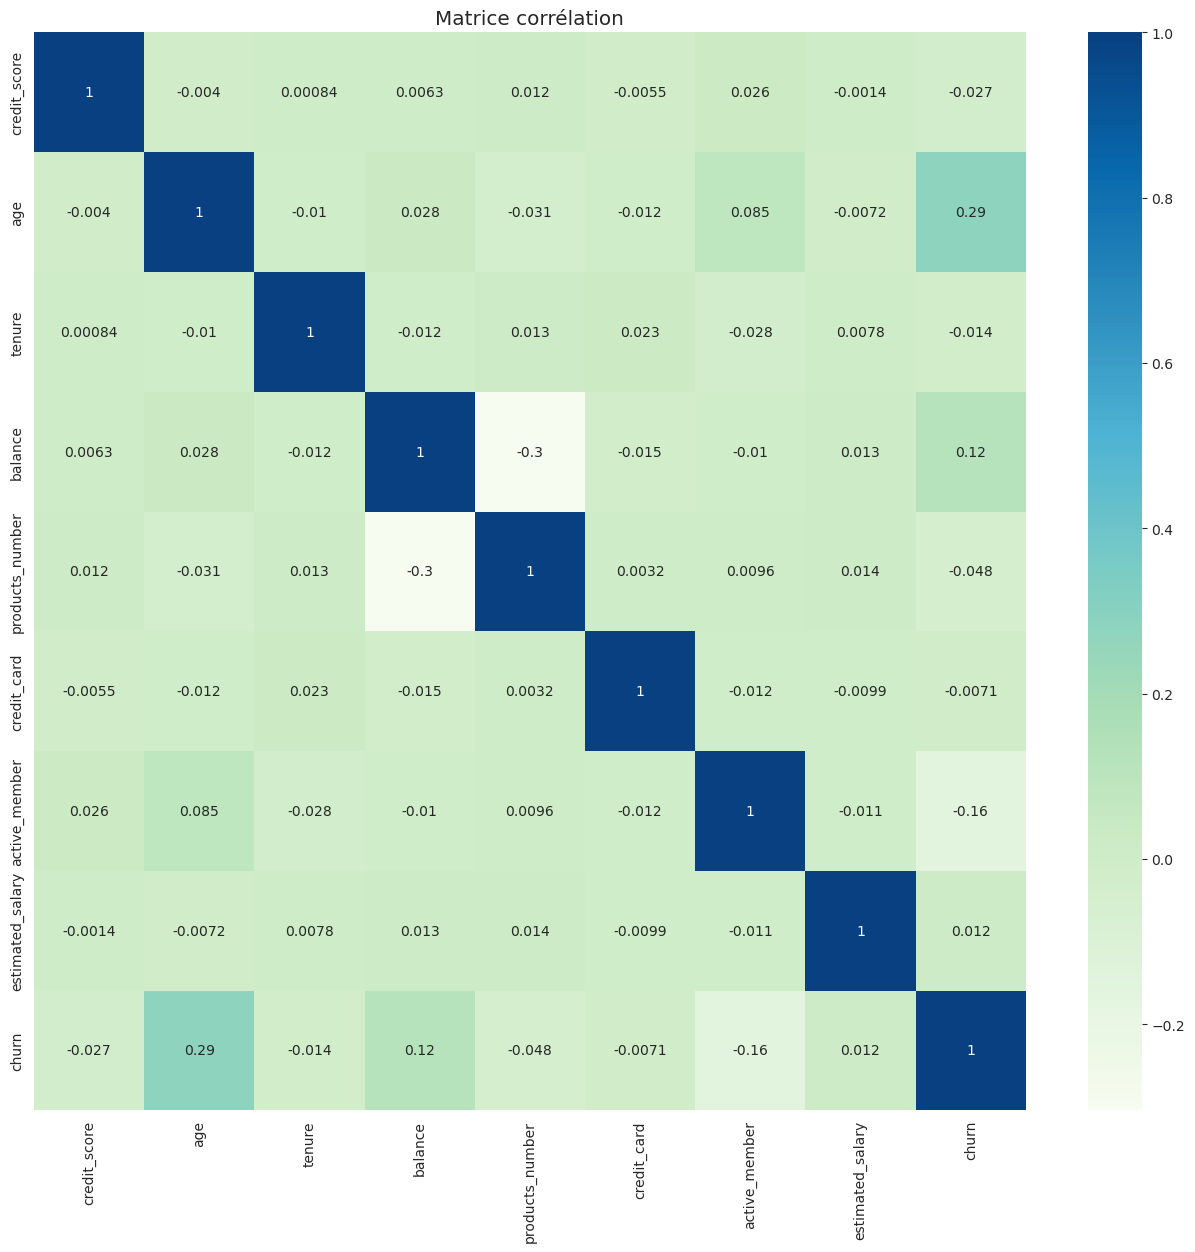

In [324]:
# instancier BivariateDataExplorer
exploration_Bivariate = BivariateDataExplorer(df_churn)

# voir heatmap corrélation
exploration_Bivariate.numVSnum_heatmap_corr()


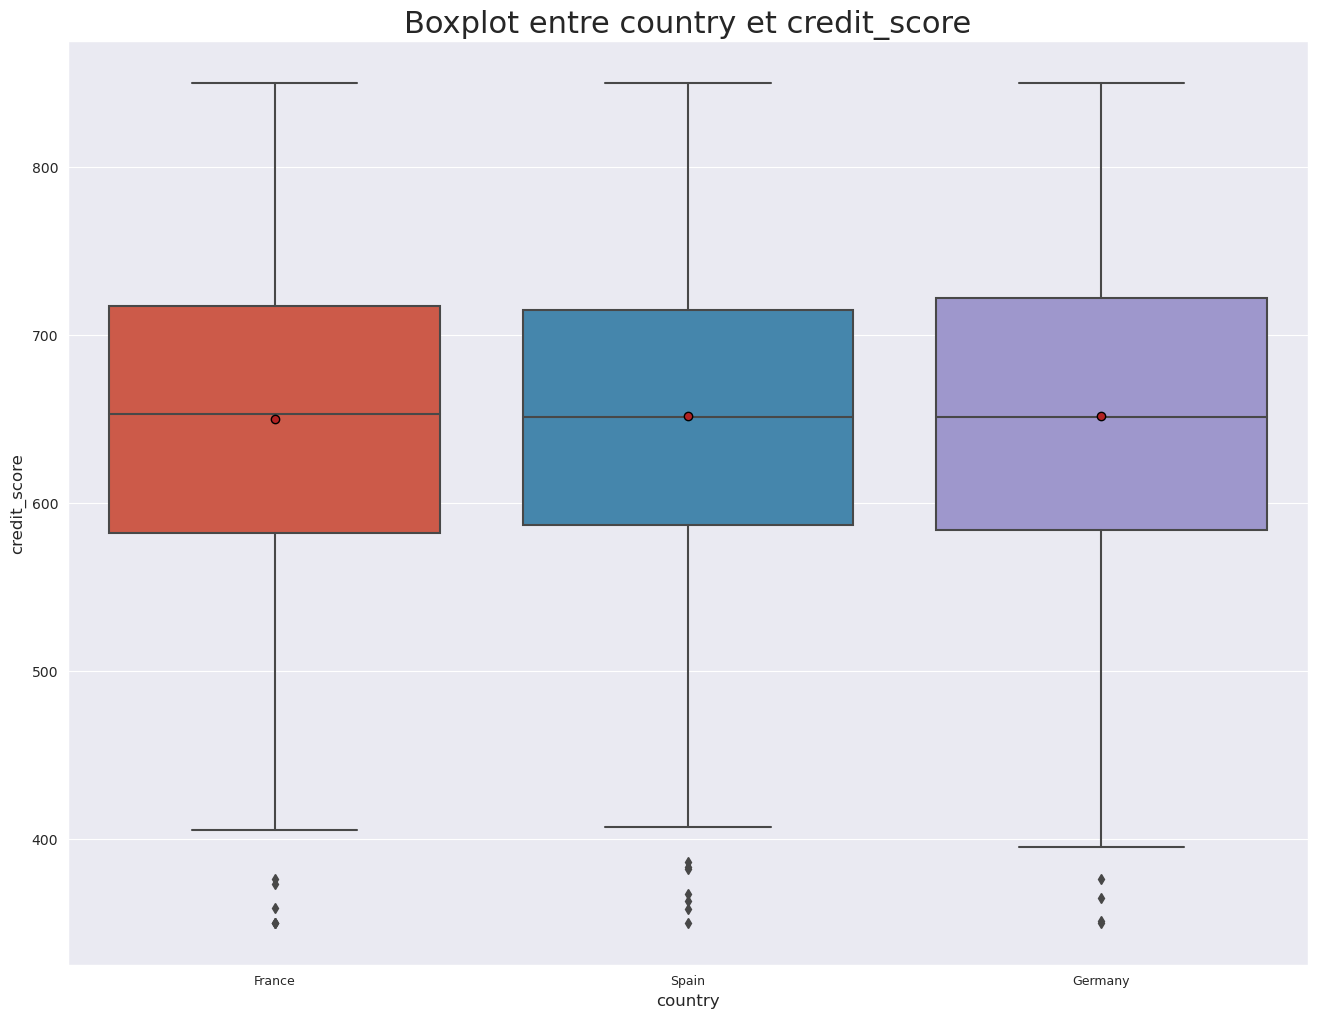

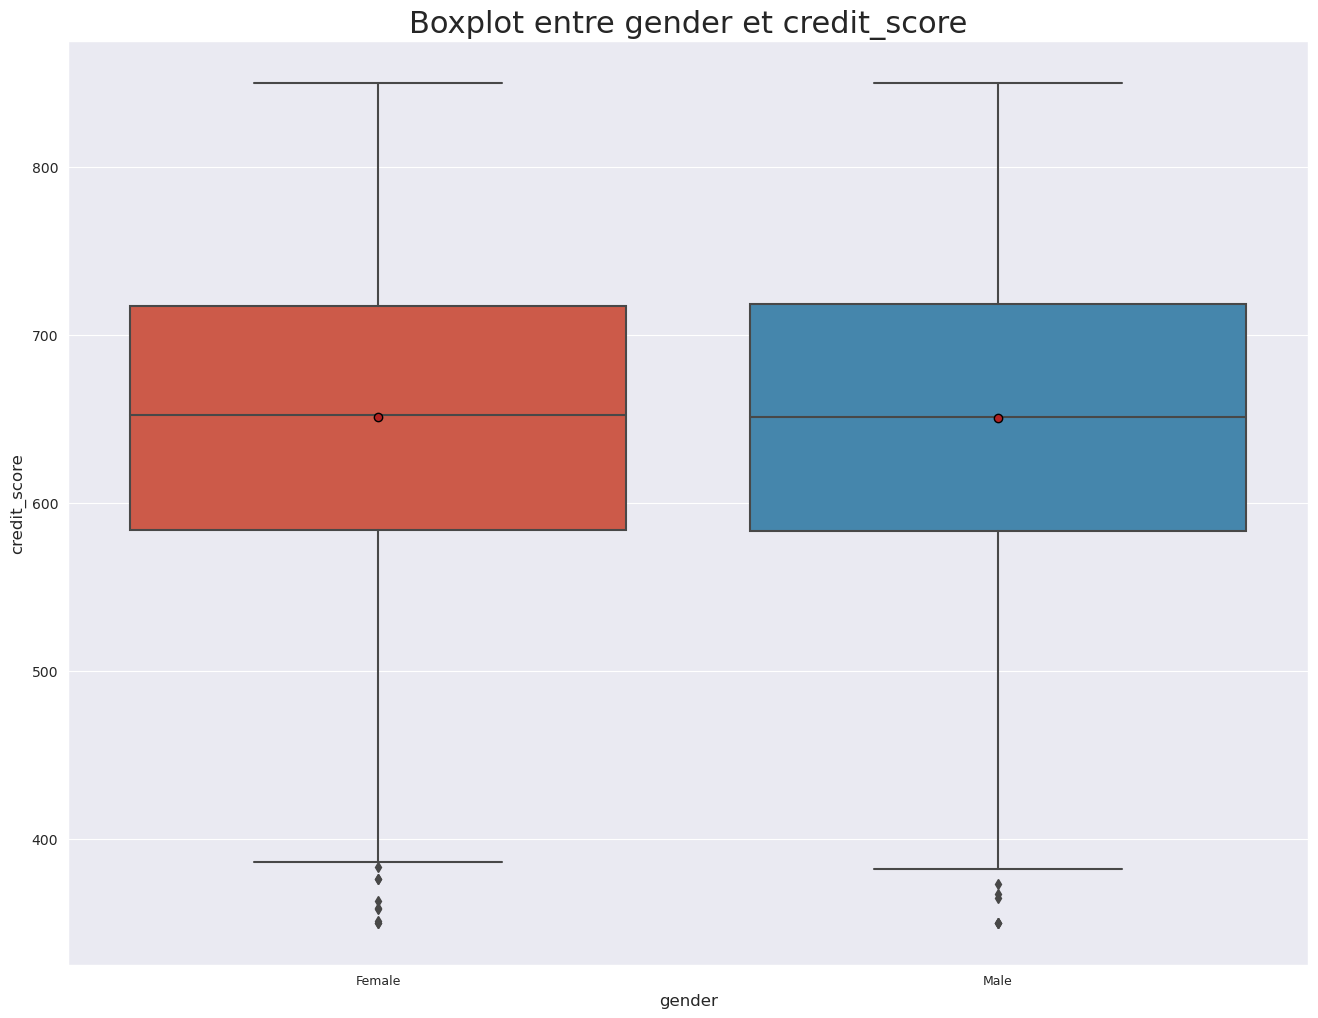

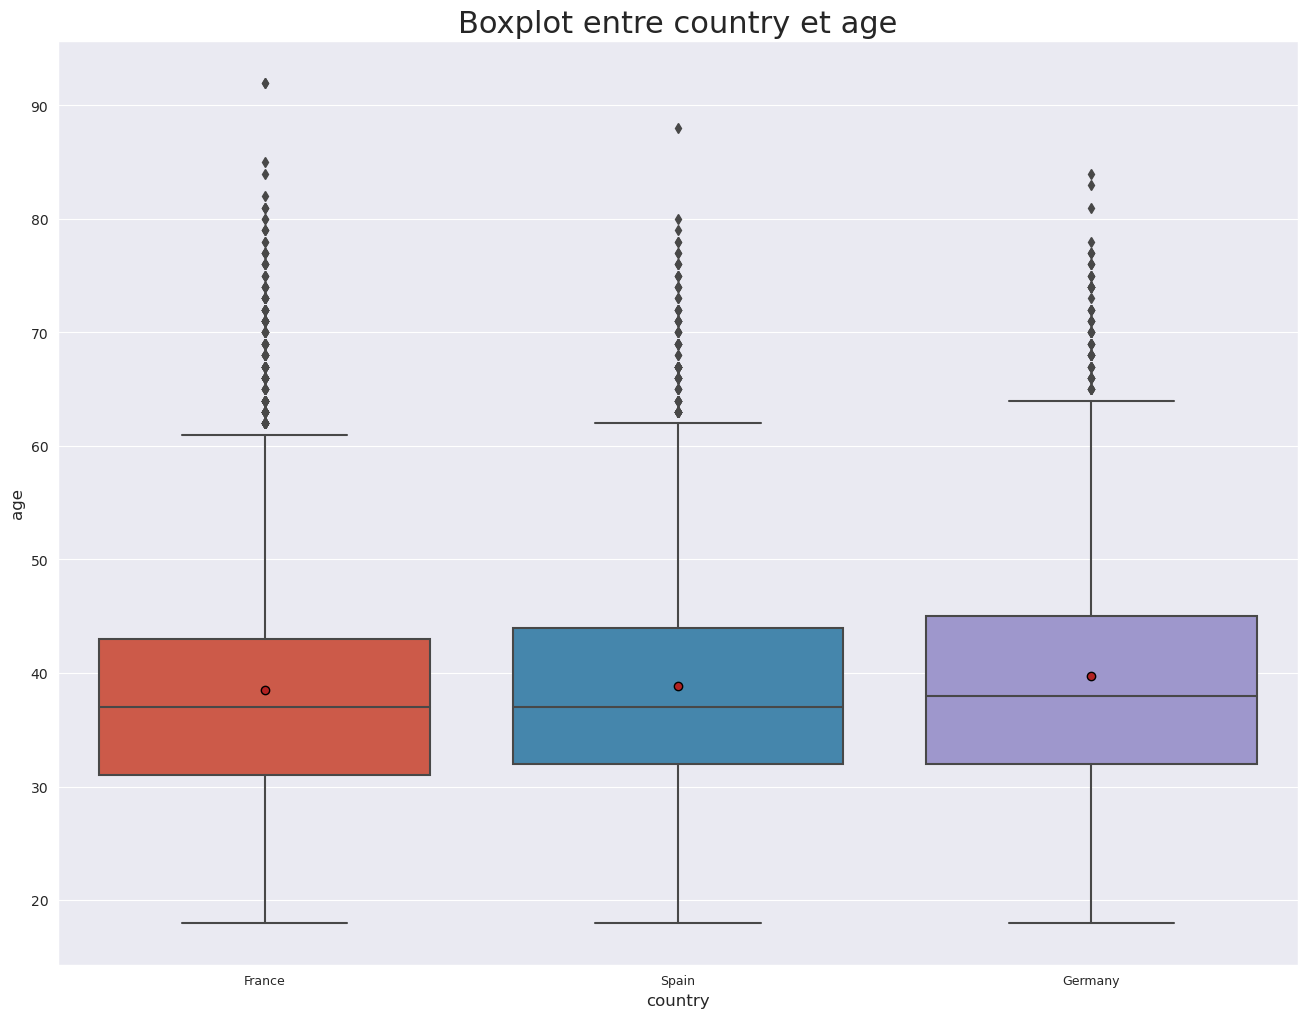

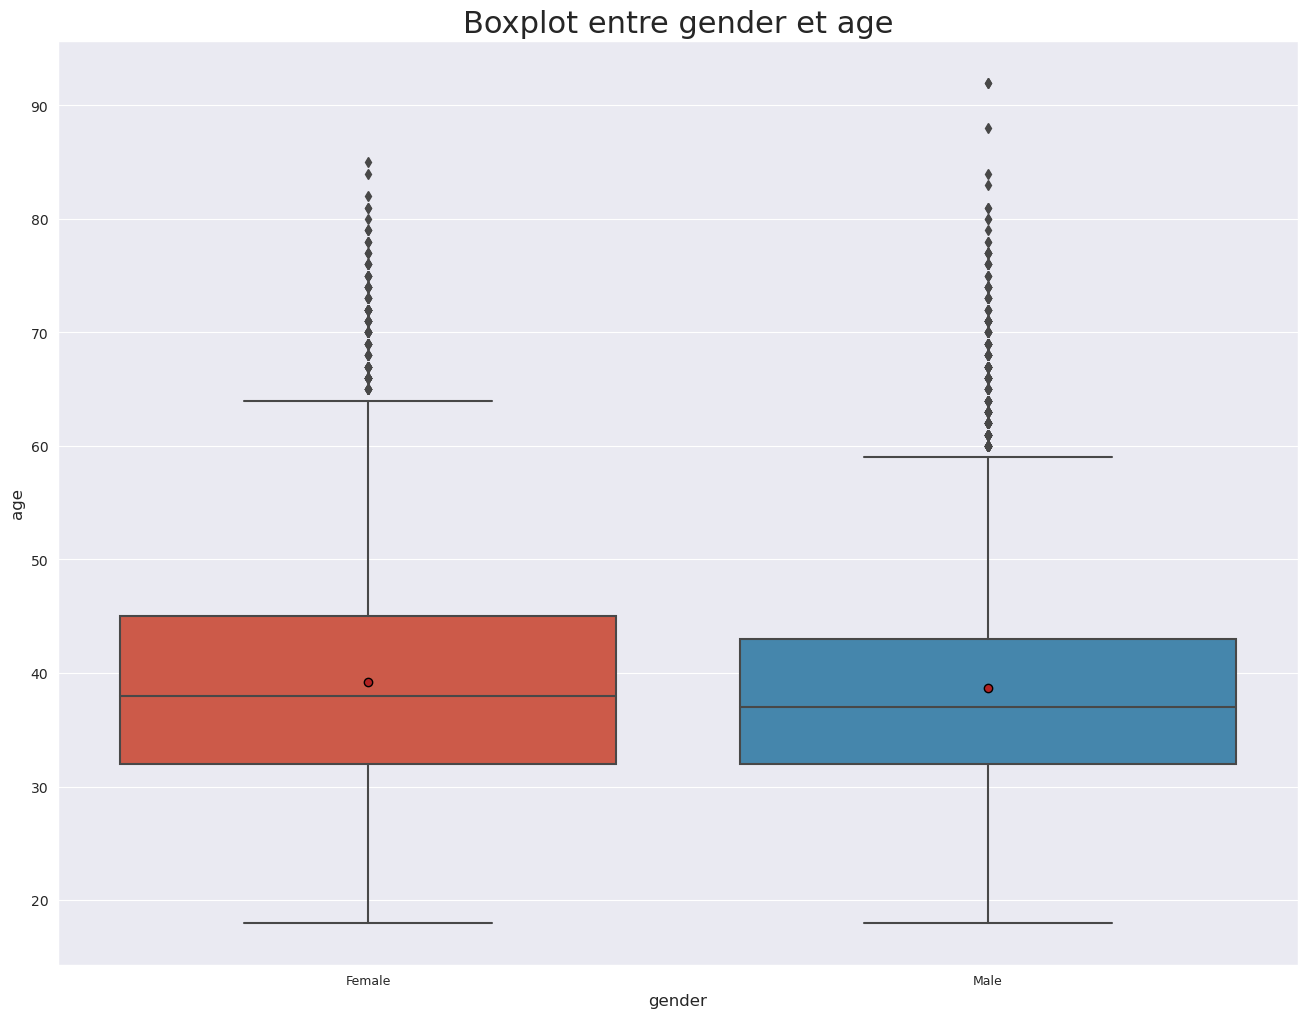

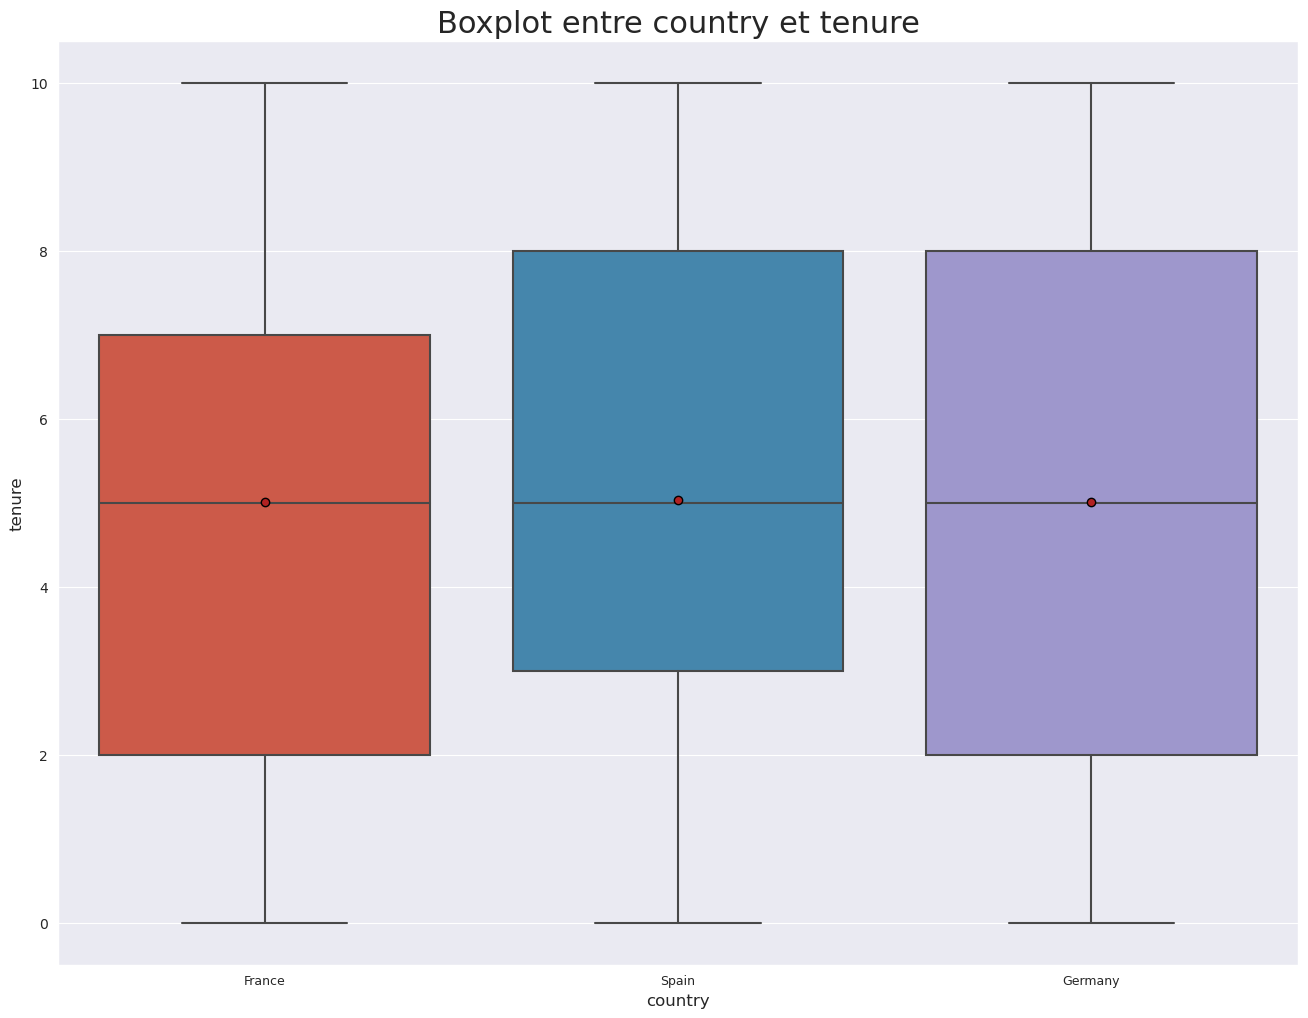

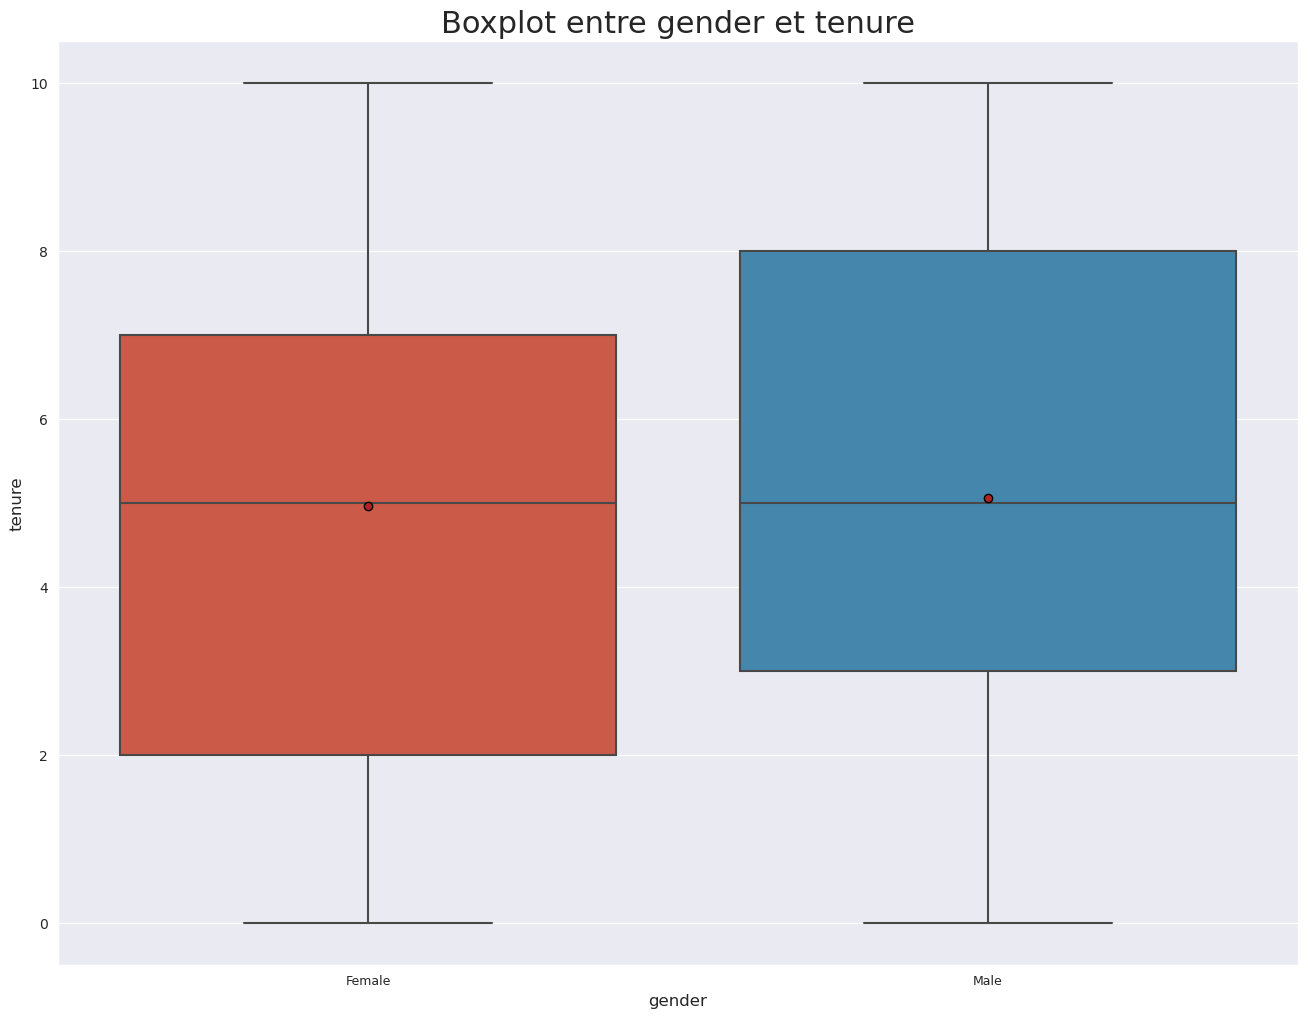

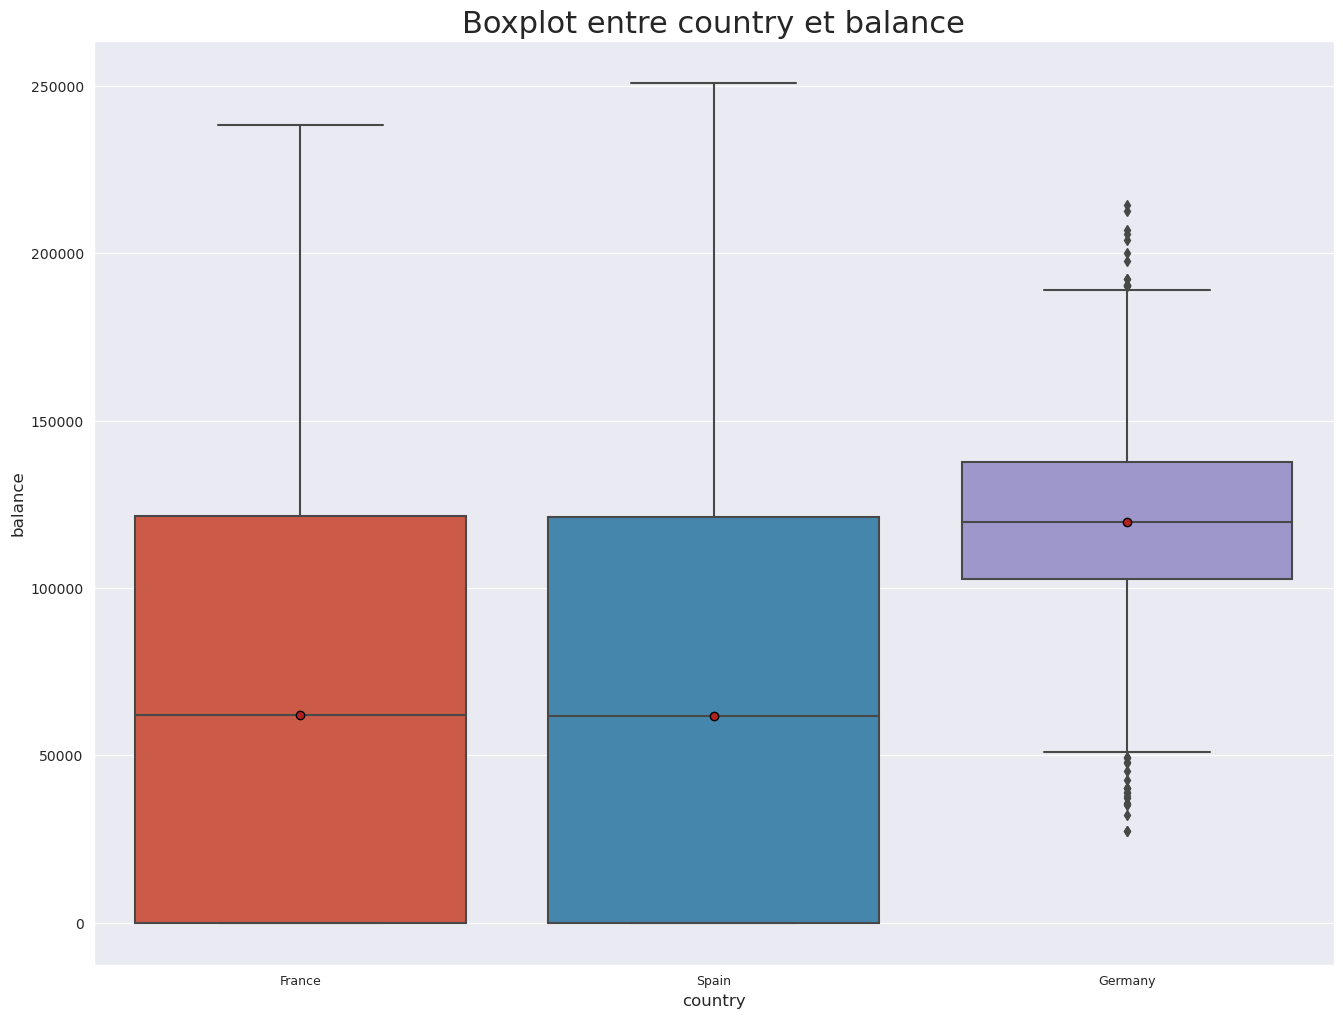

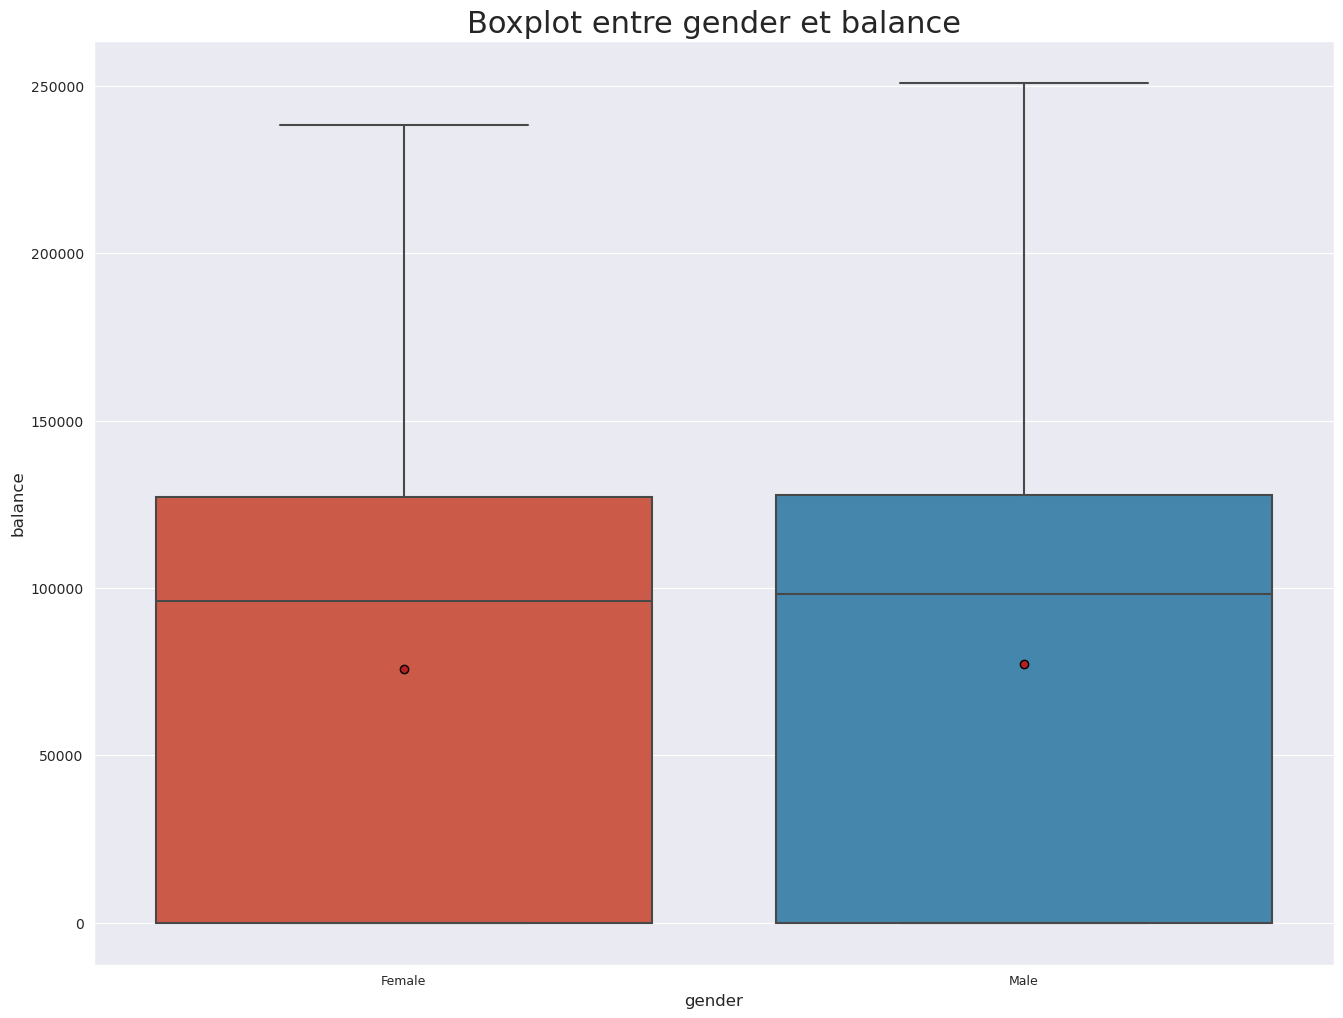

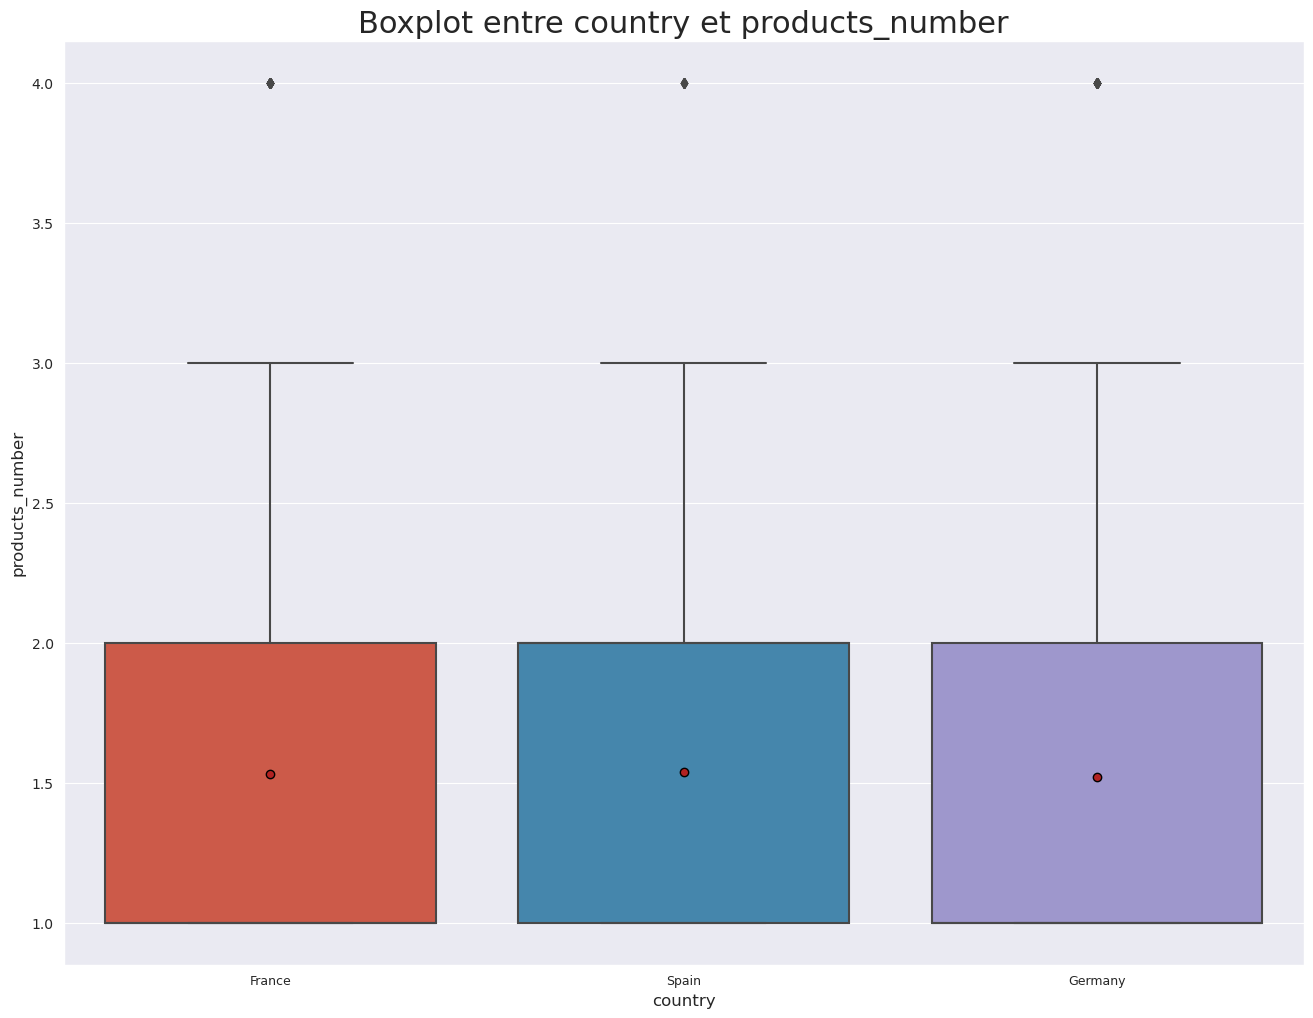

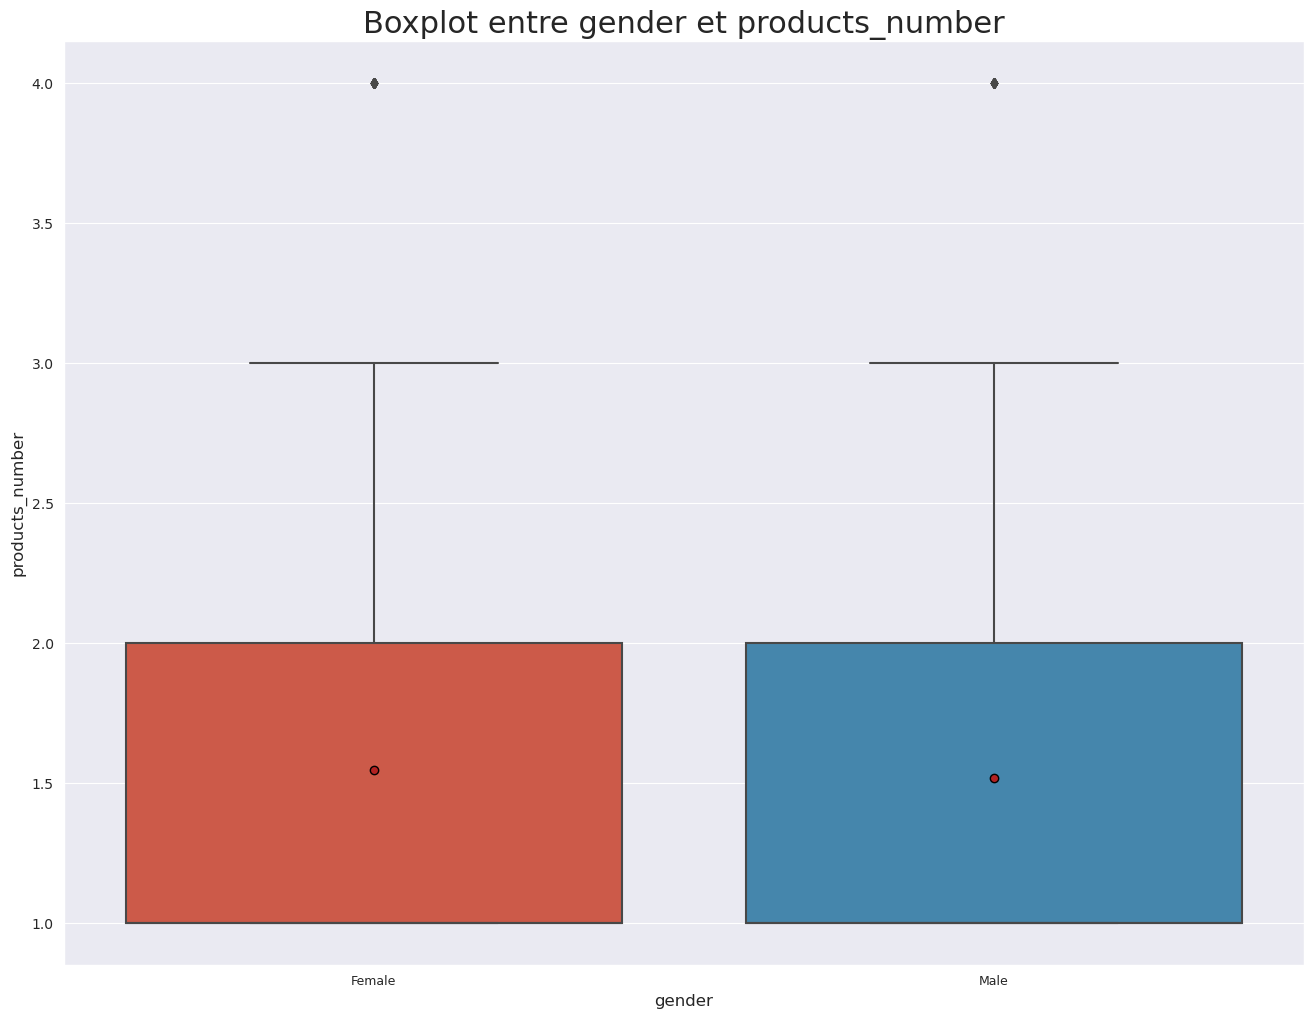

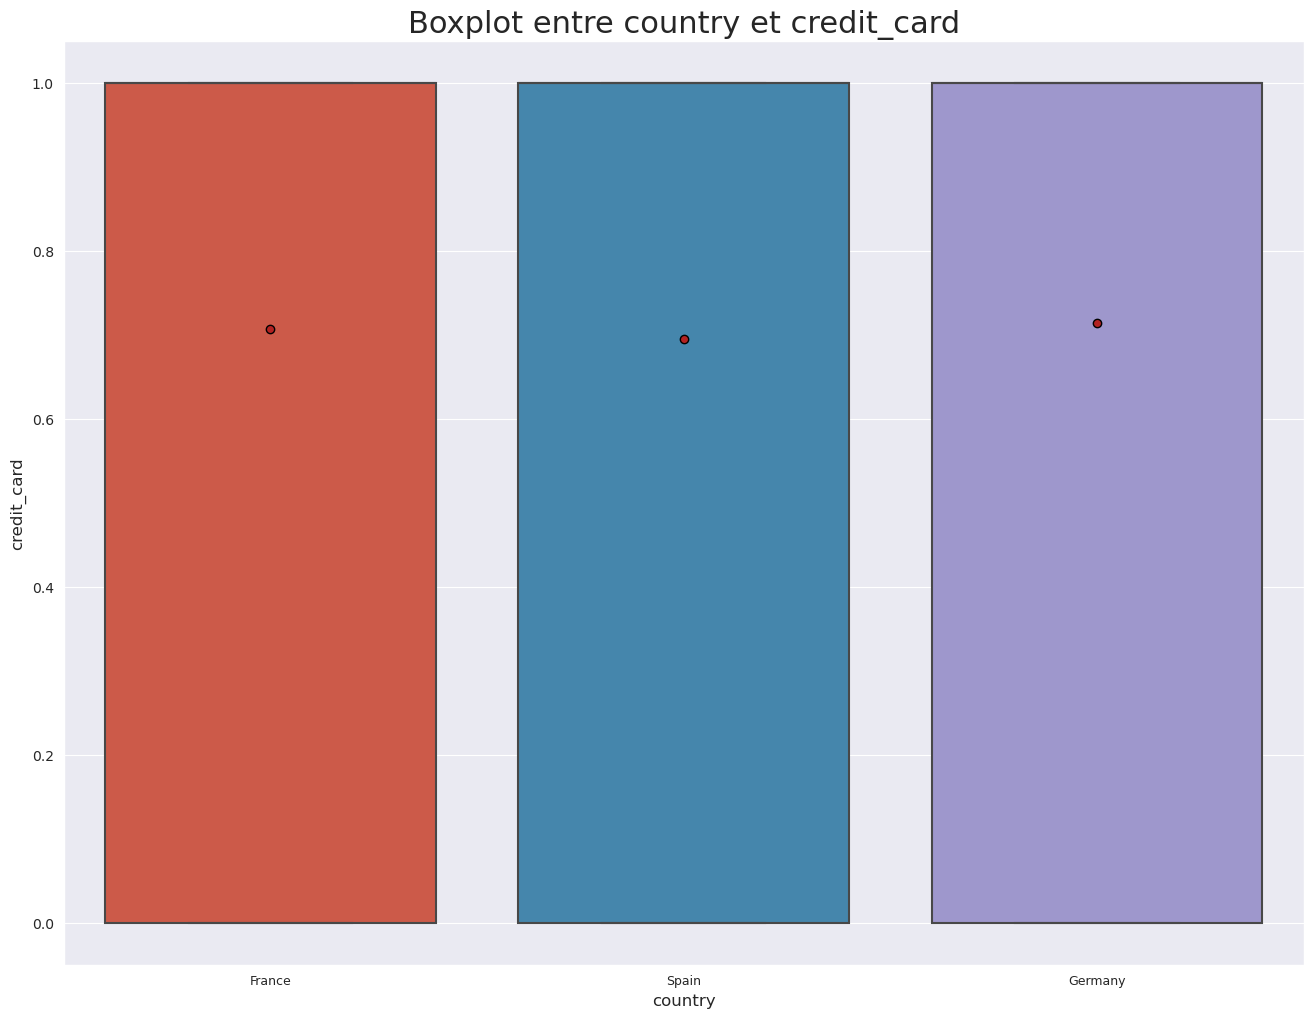

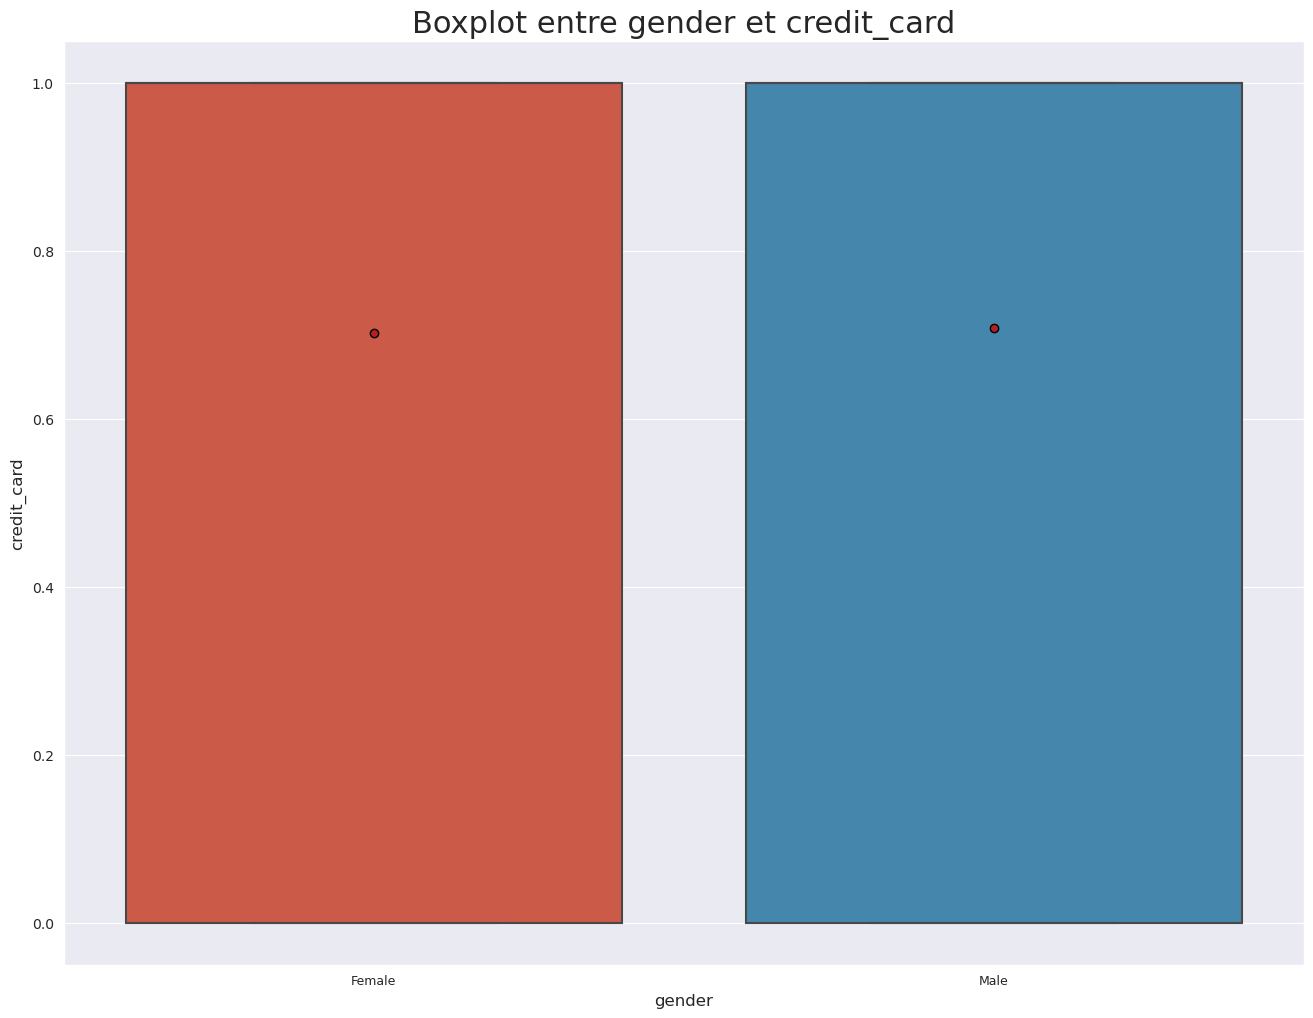

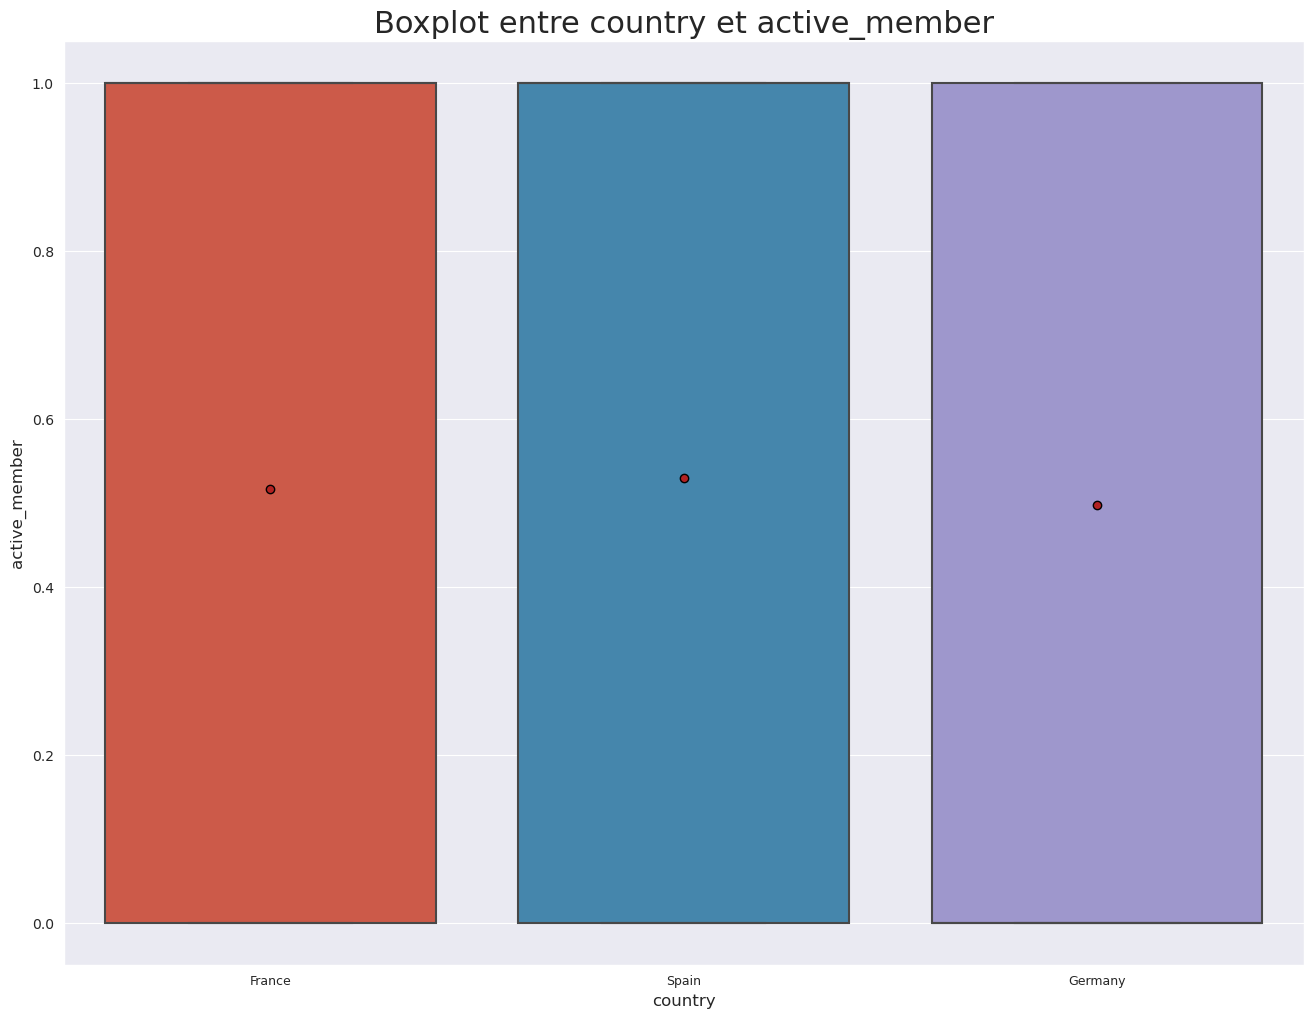

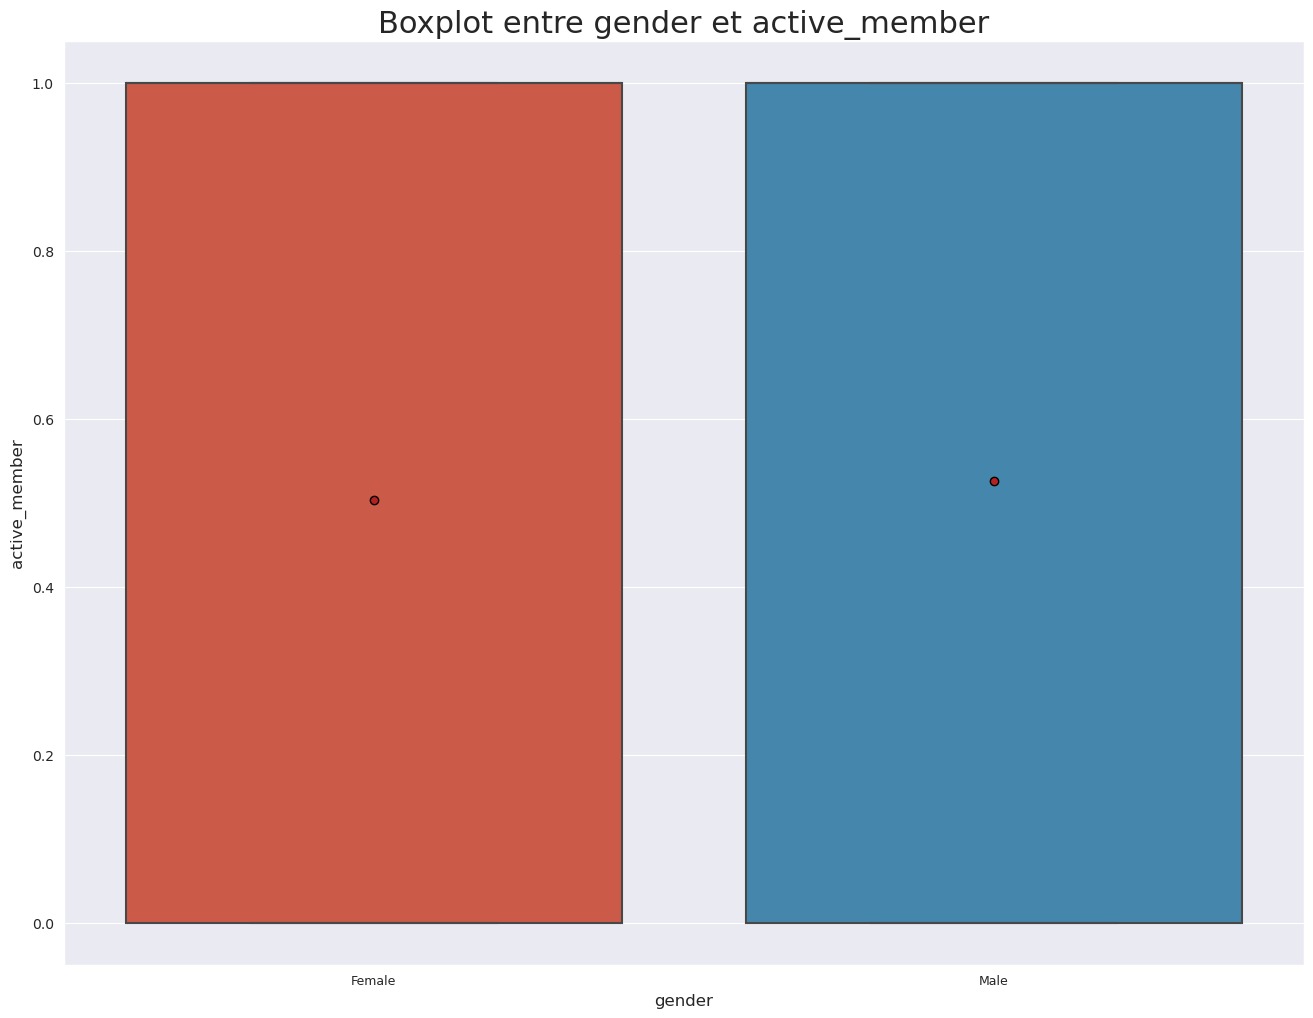

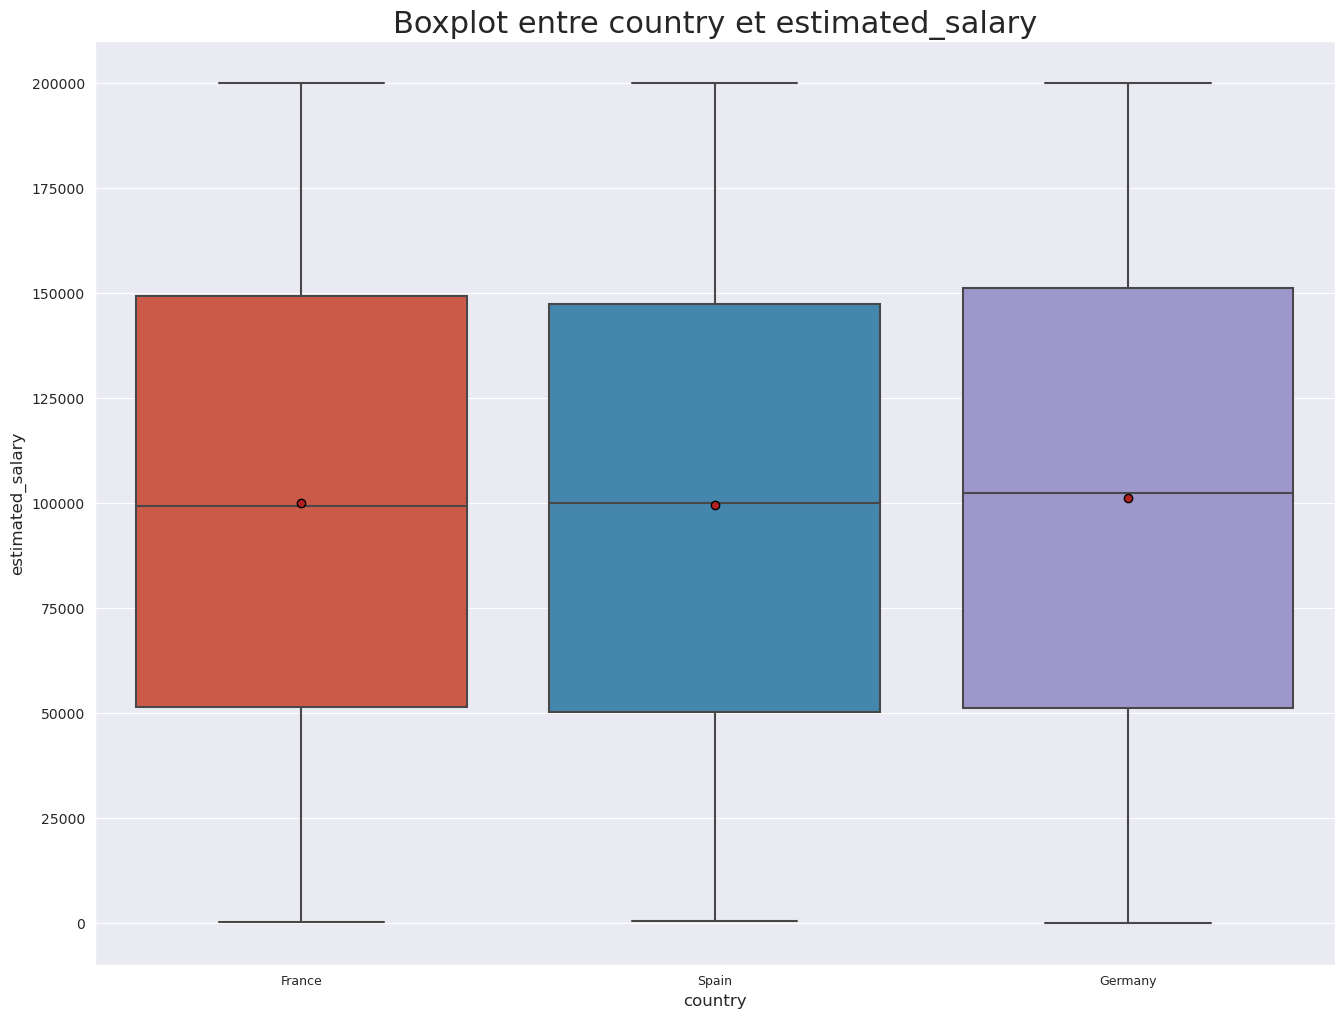

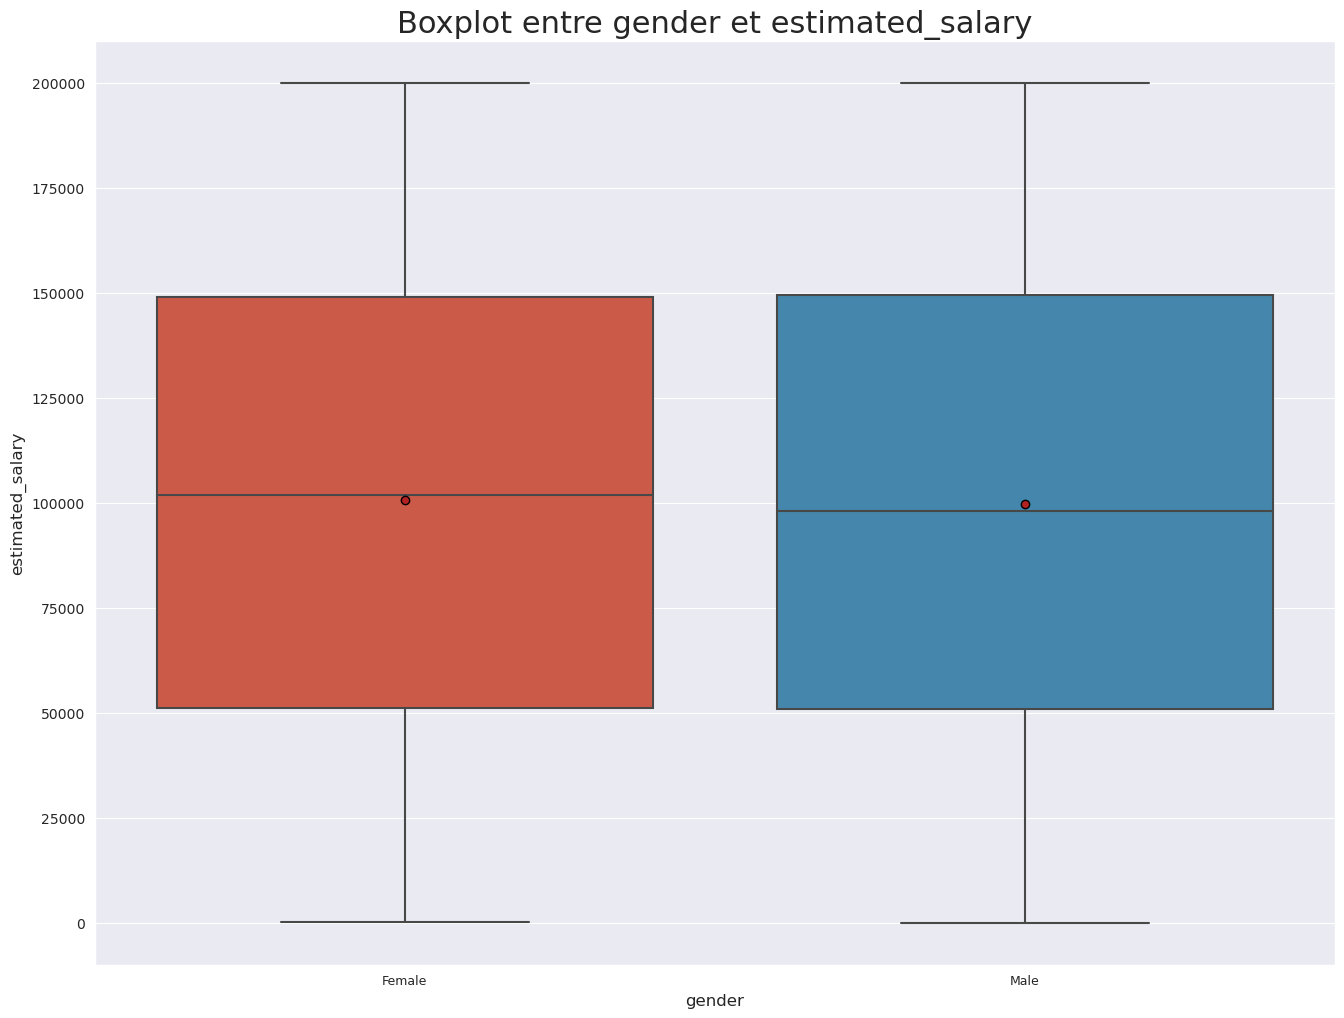

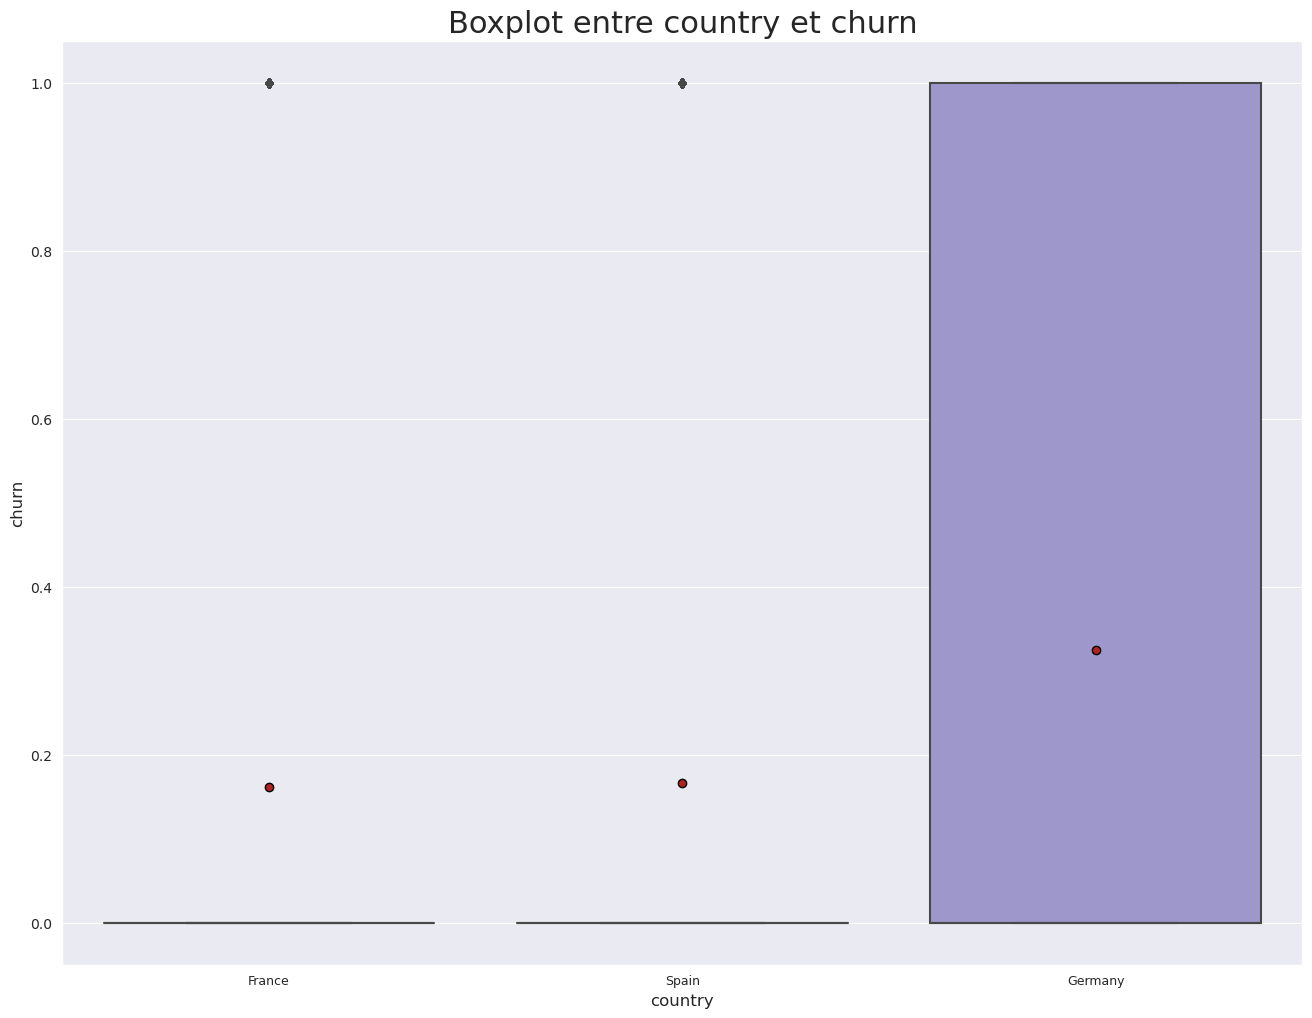

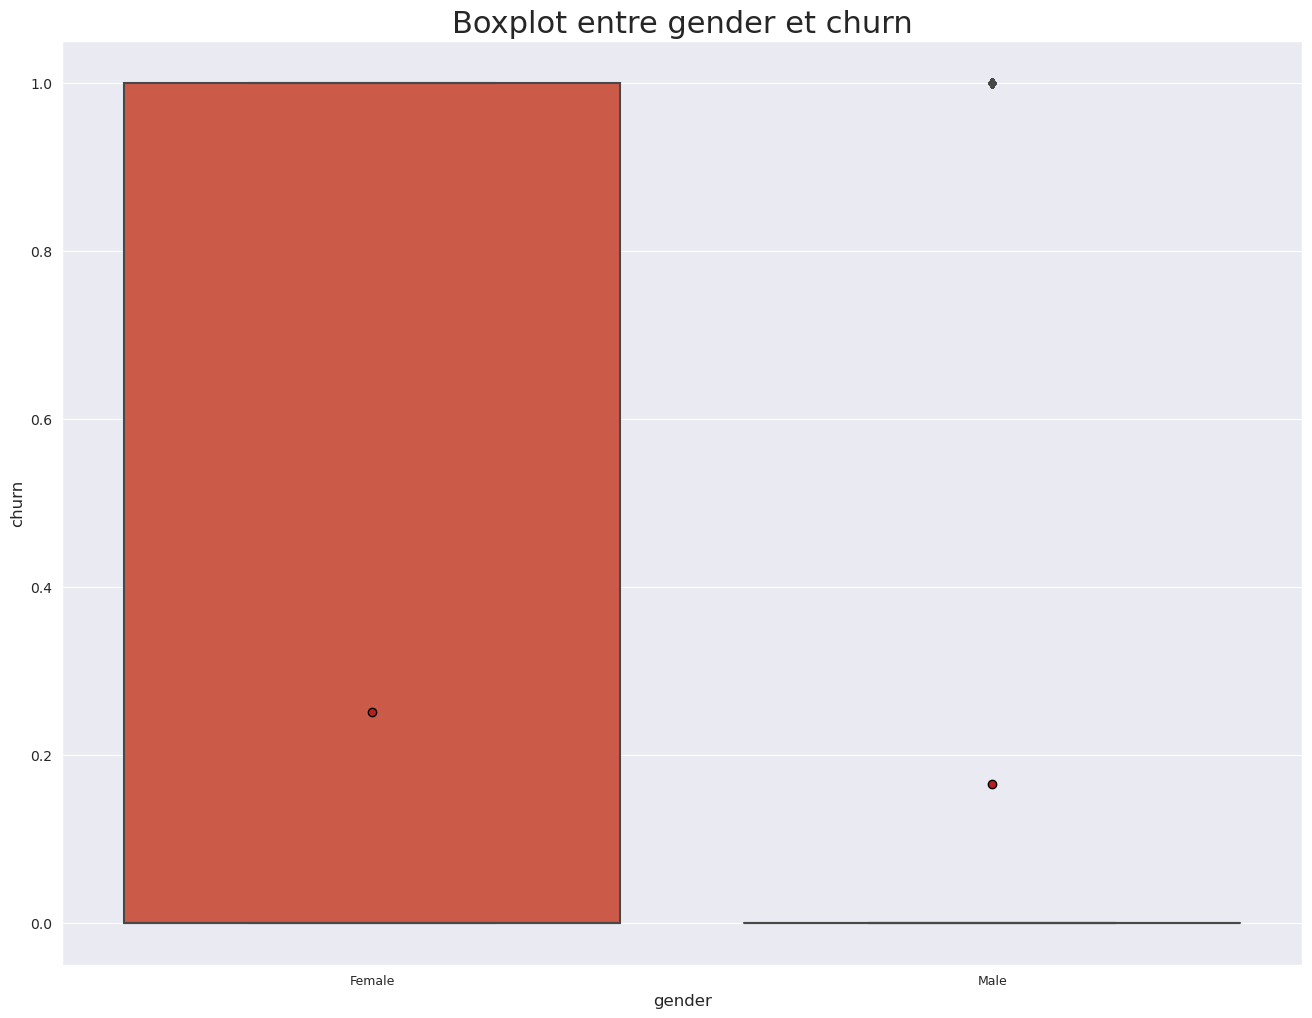

In [325]:
# boucle pour afficher boxplot avec combinaisons variables numériques et object
for i in li_number:
  for j in li_cat:
    if i!=j:
        exploration_Bivariate.categVSnum_boxplot(j,i)

In [337]:
# séléction les variables pour countplot
li_discret = list(df_churn[["tenure","products_number", "credit_card", "active_member", "churn"]])

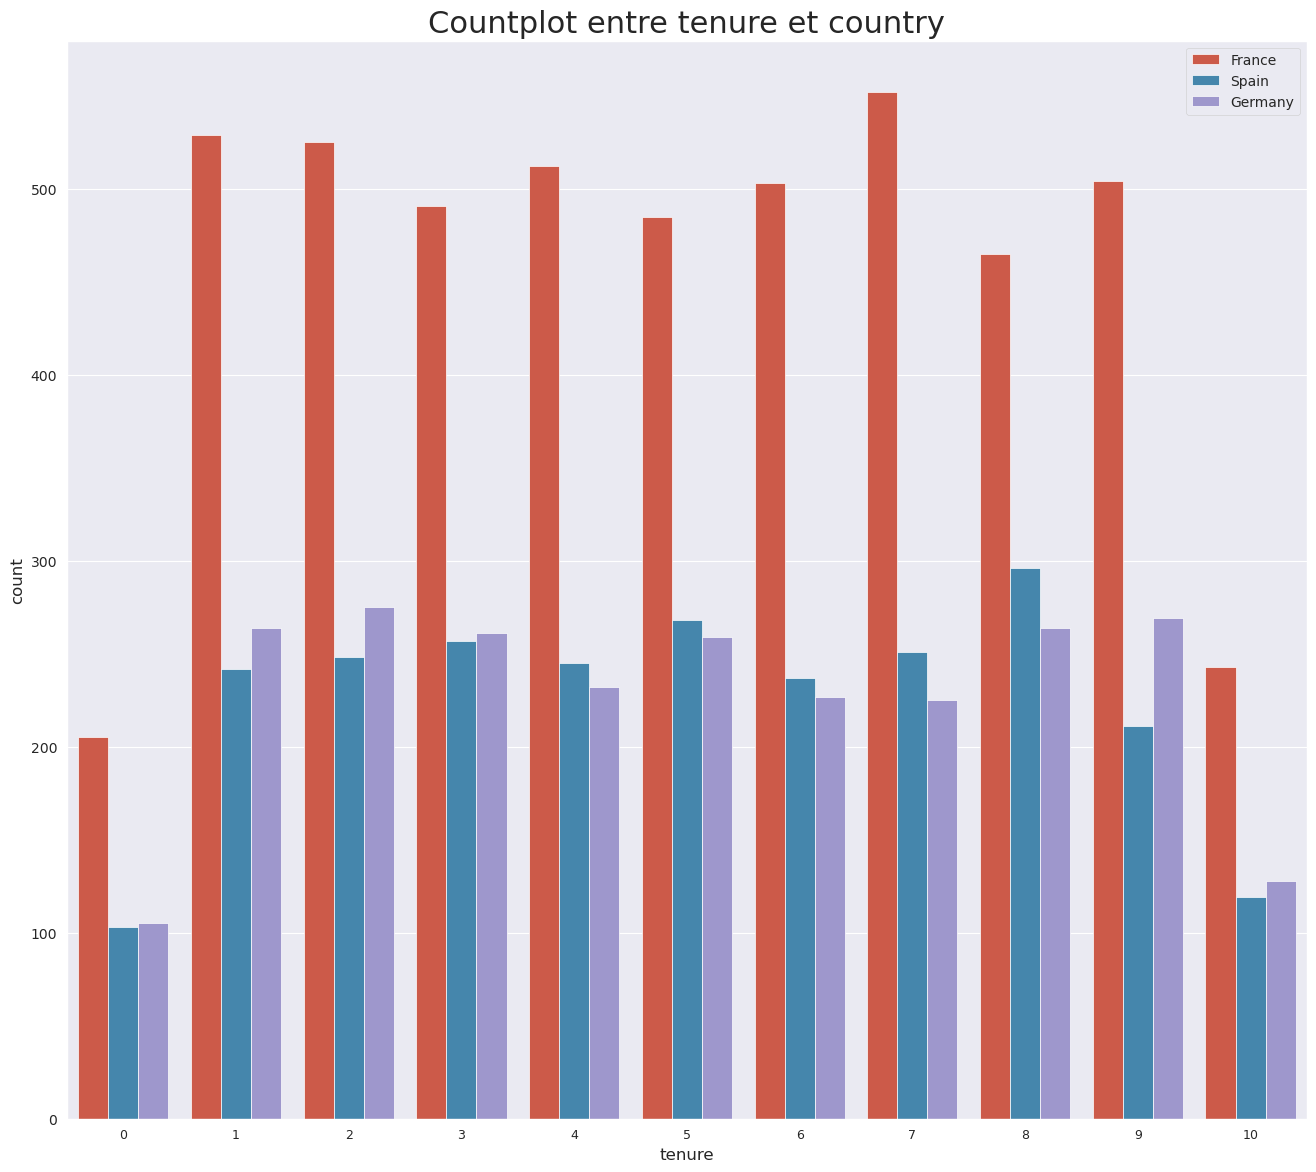

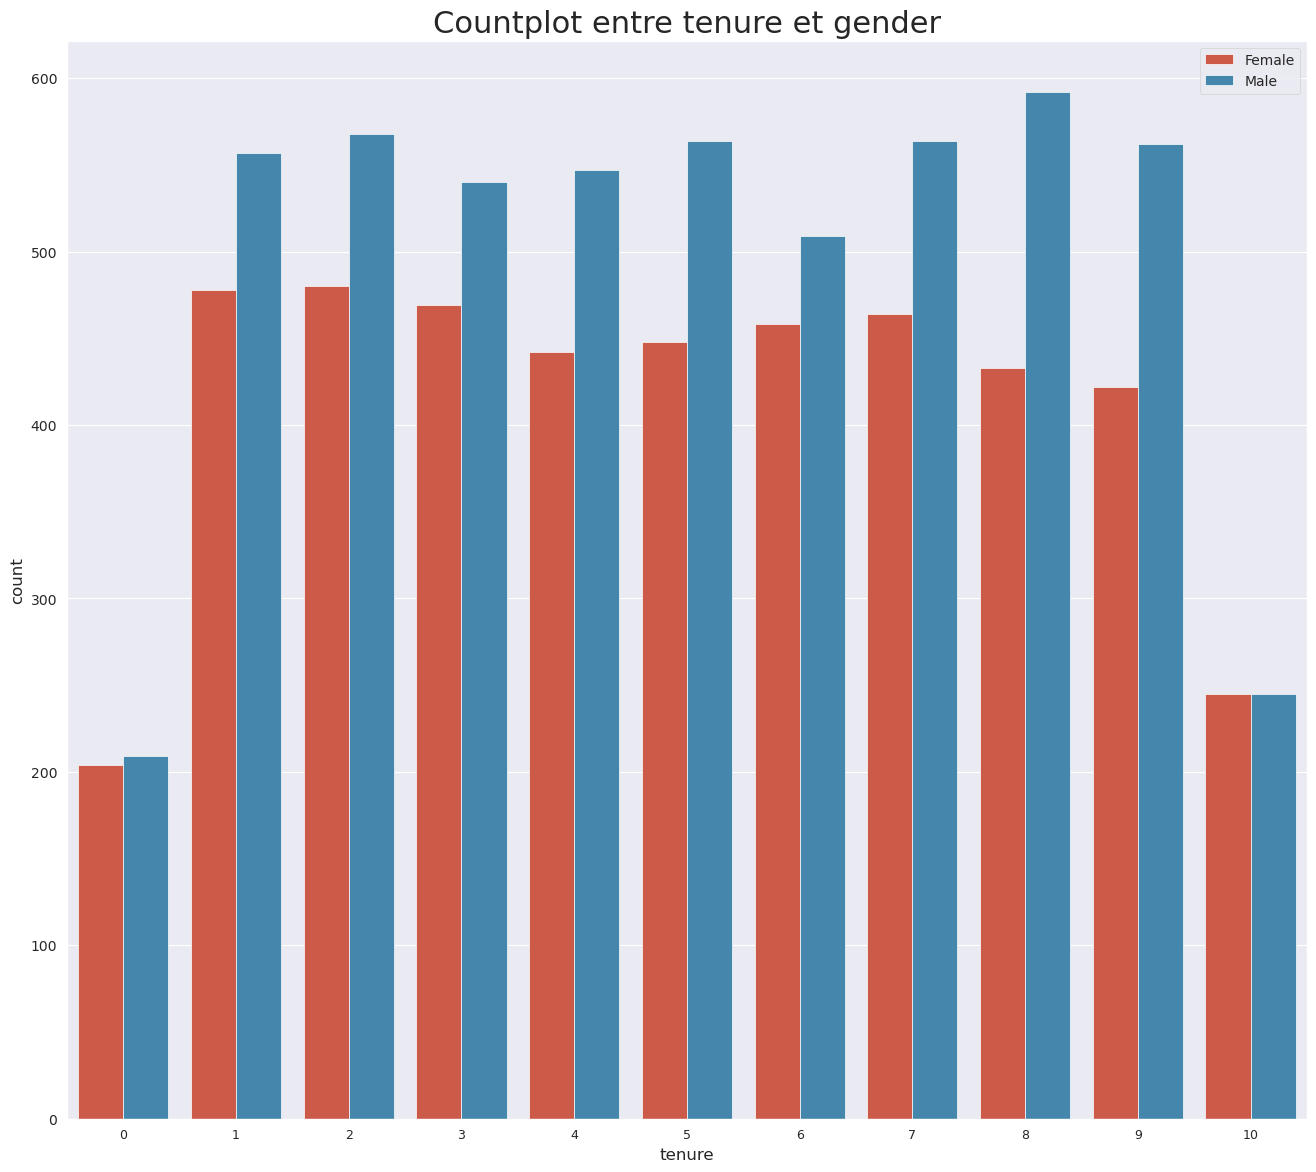

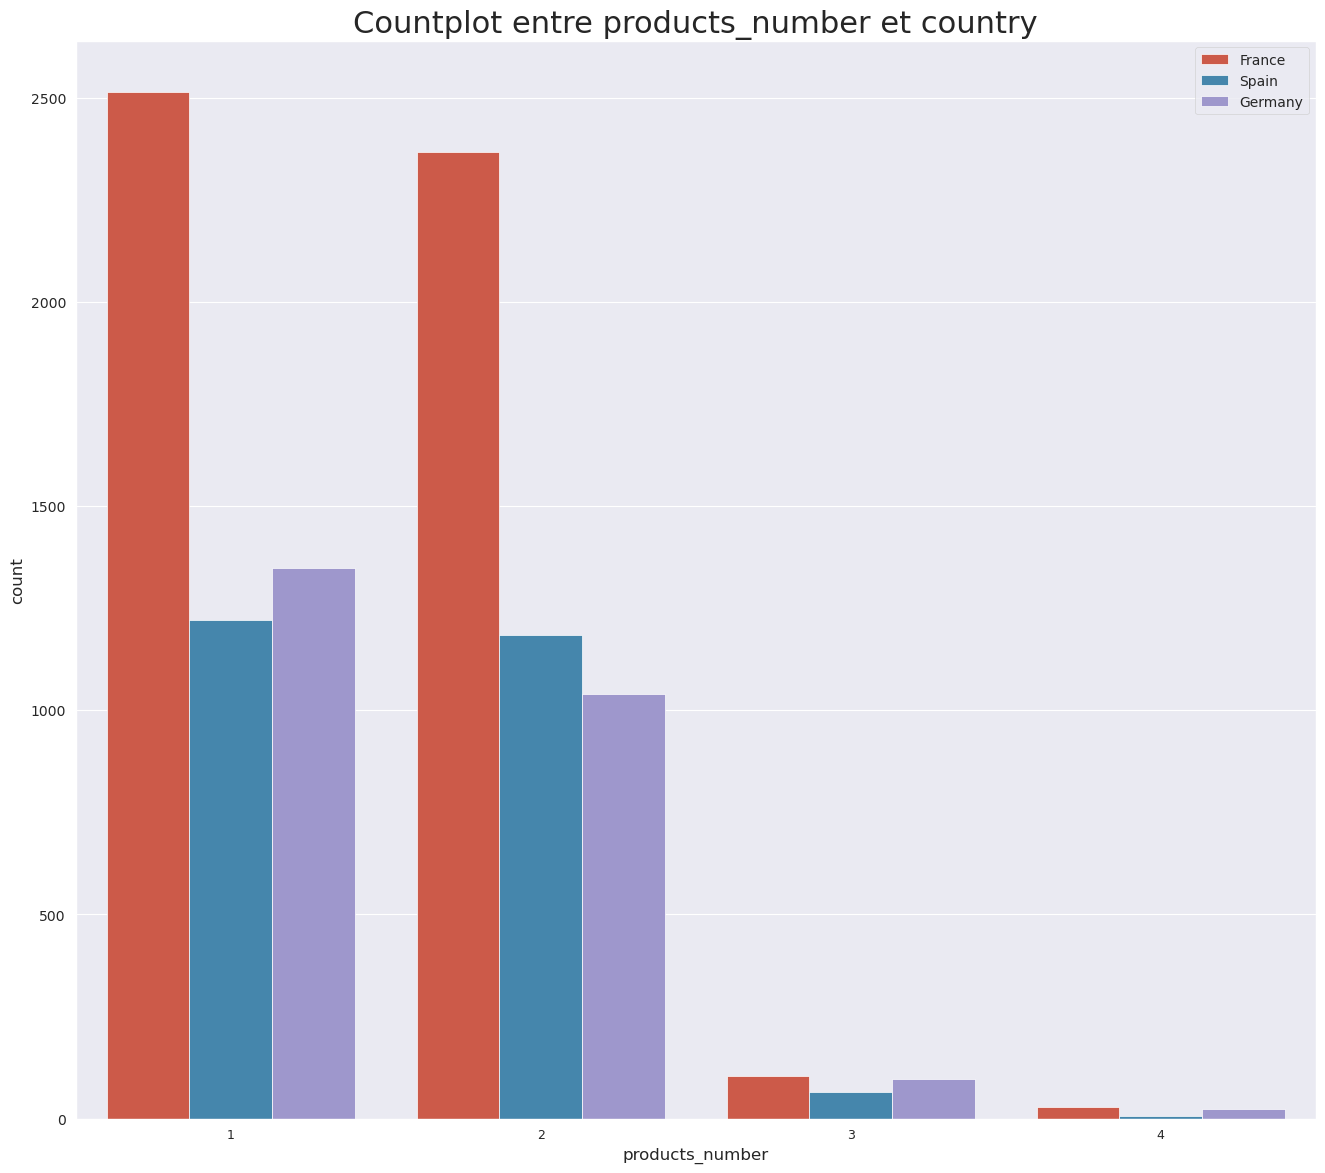

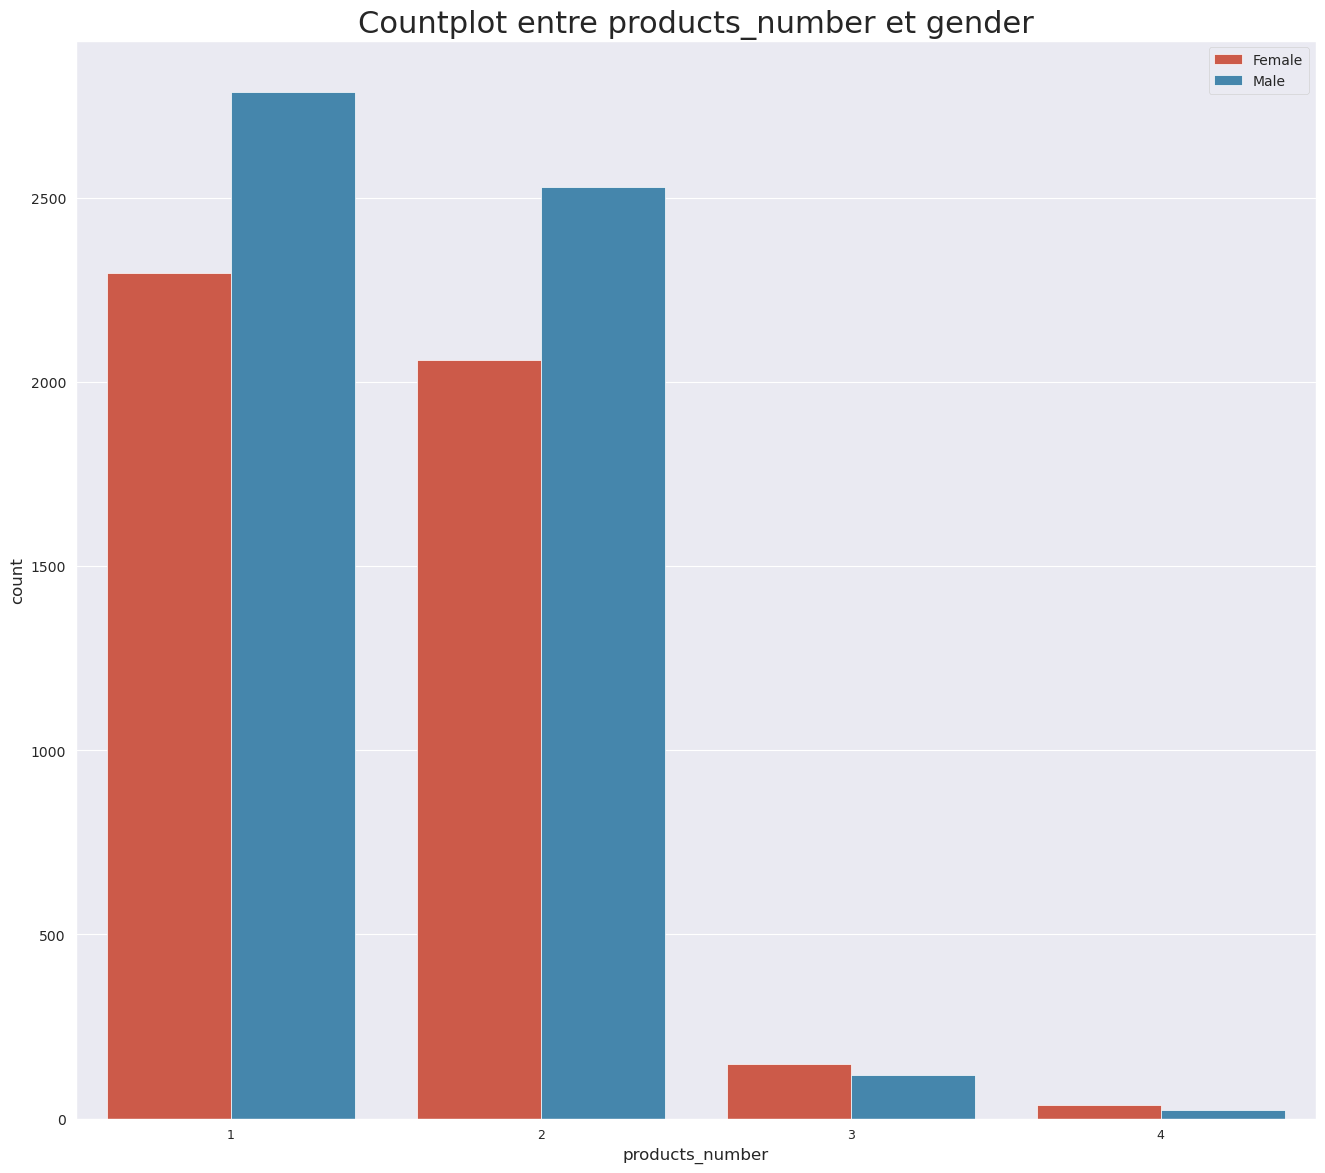

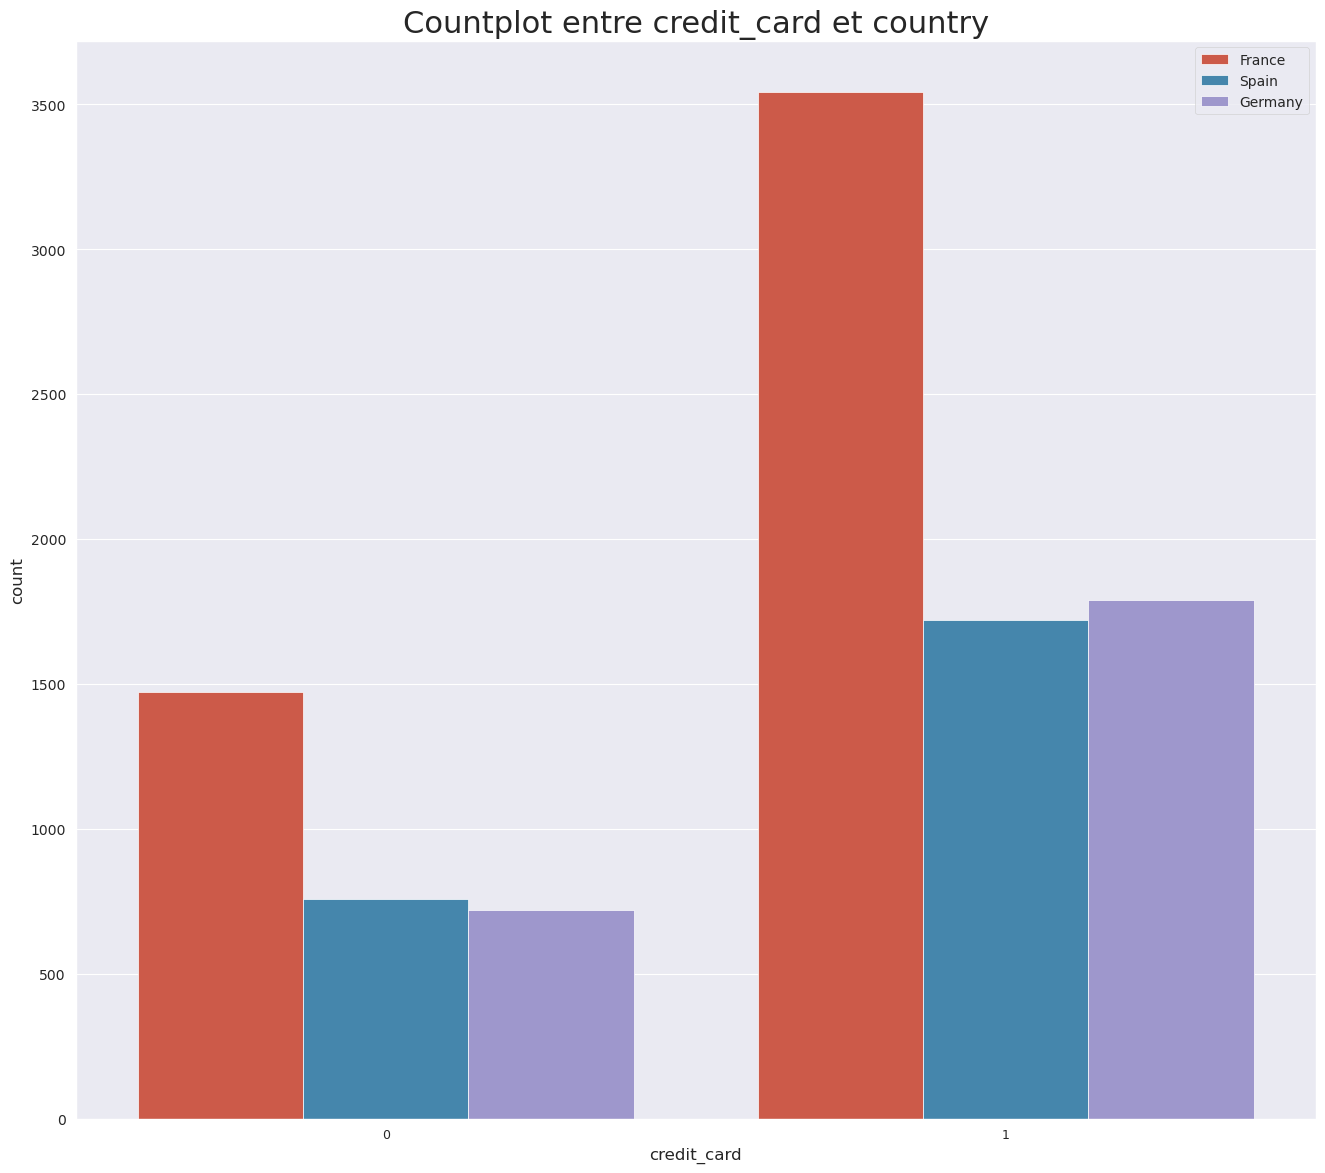

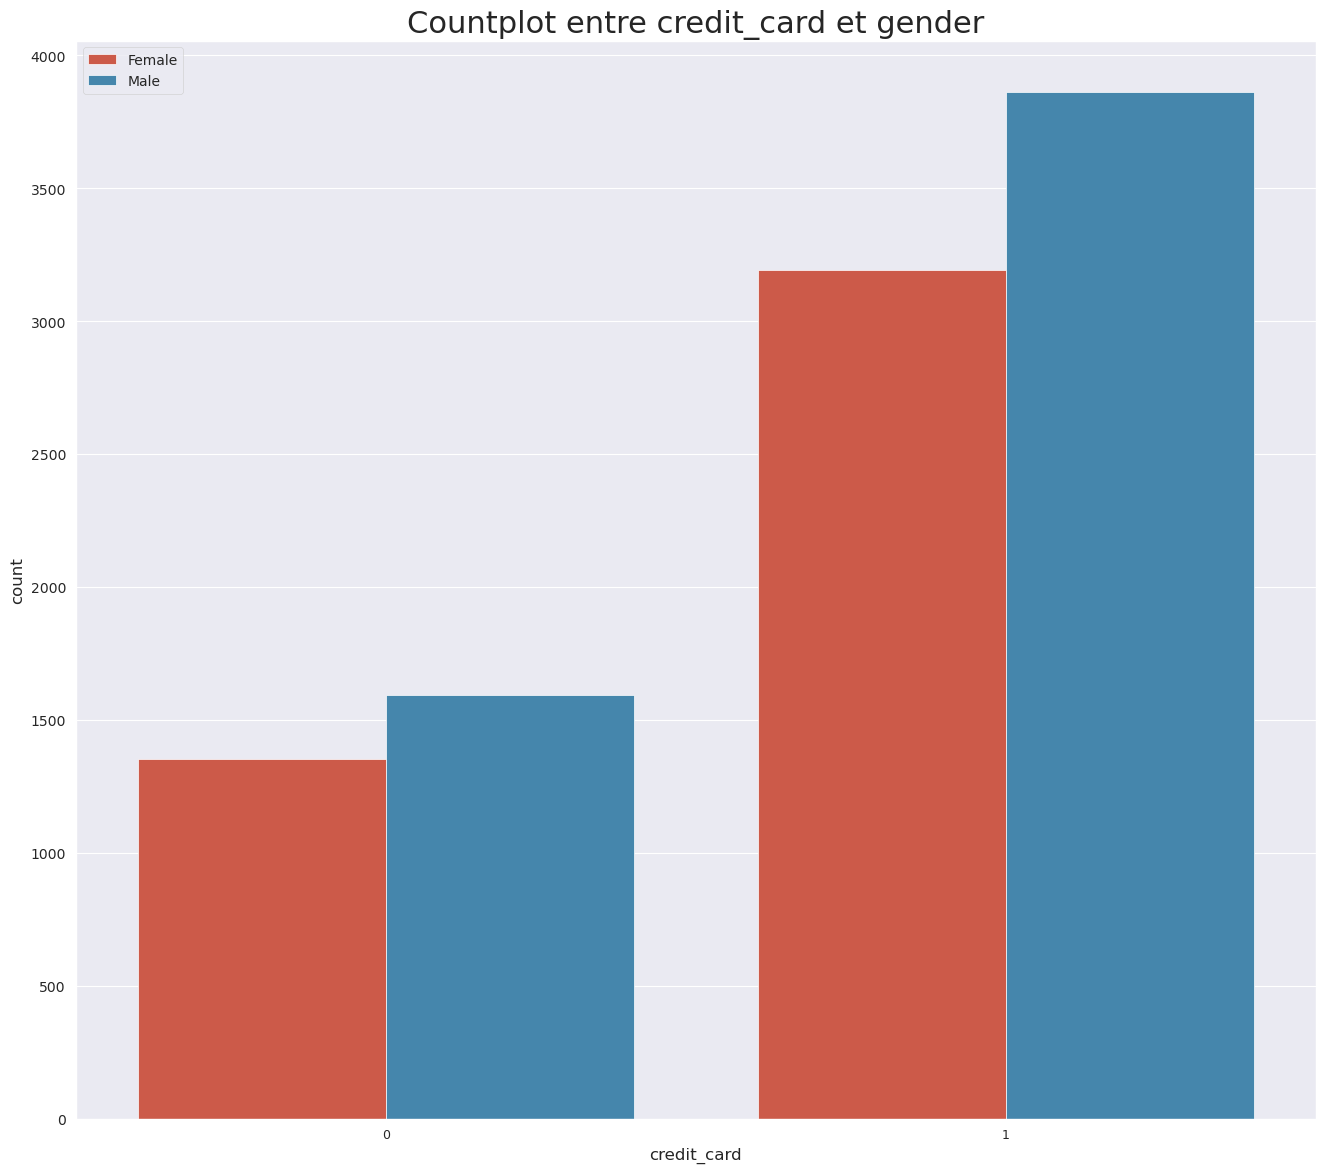

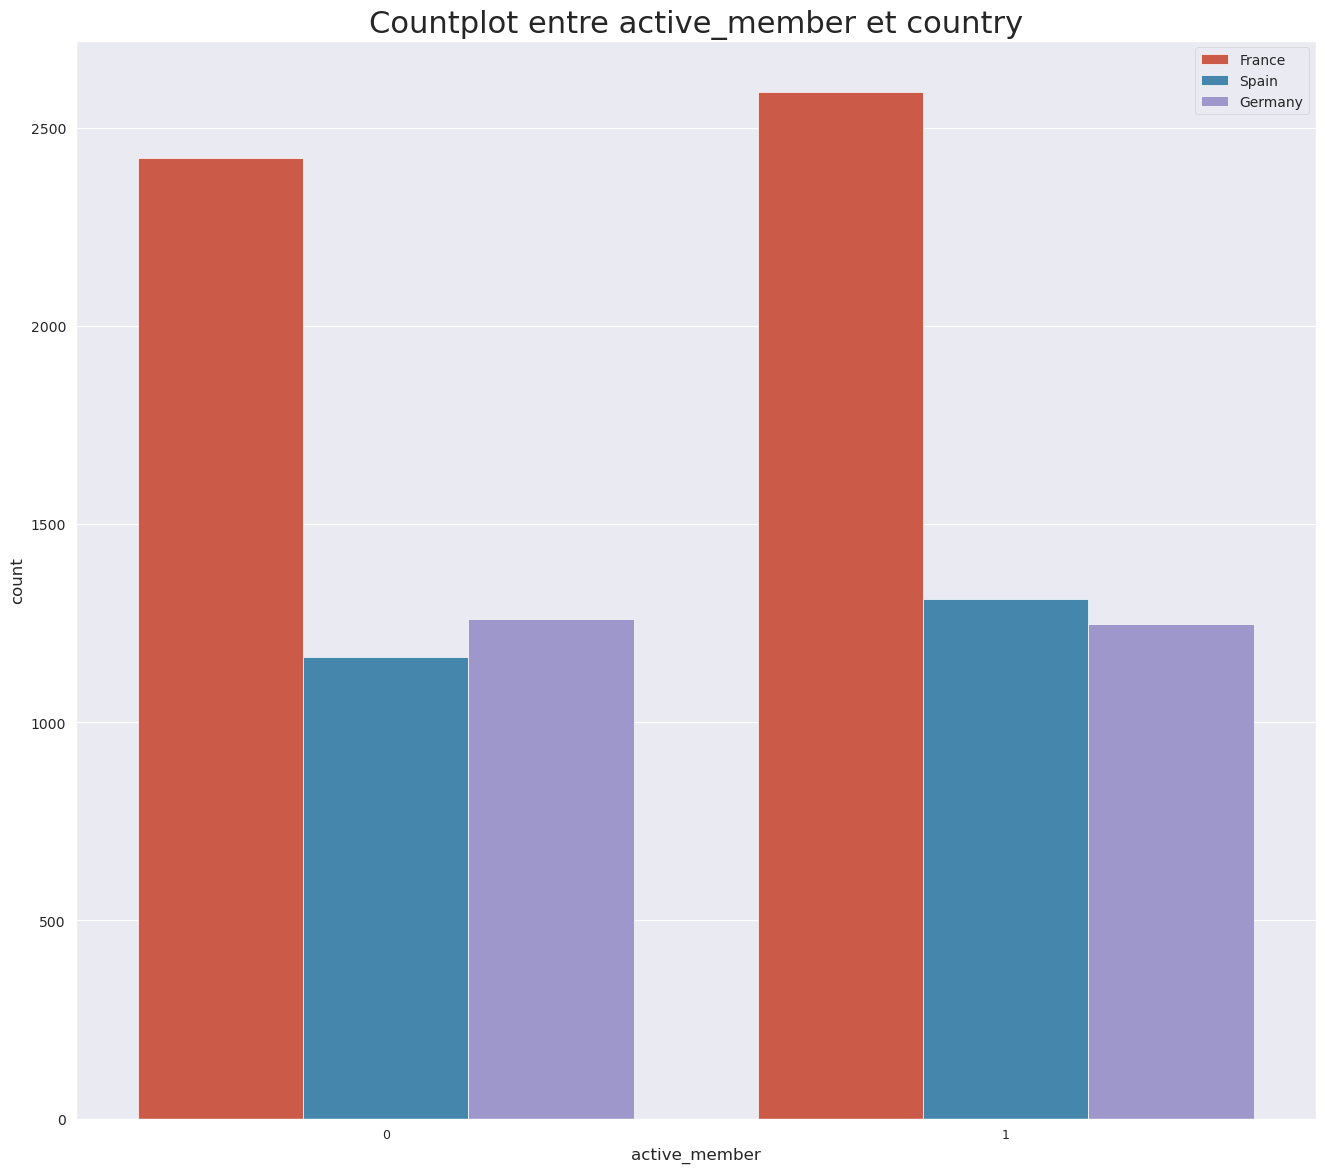

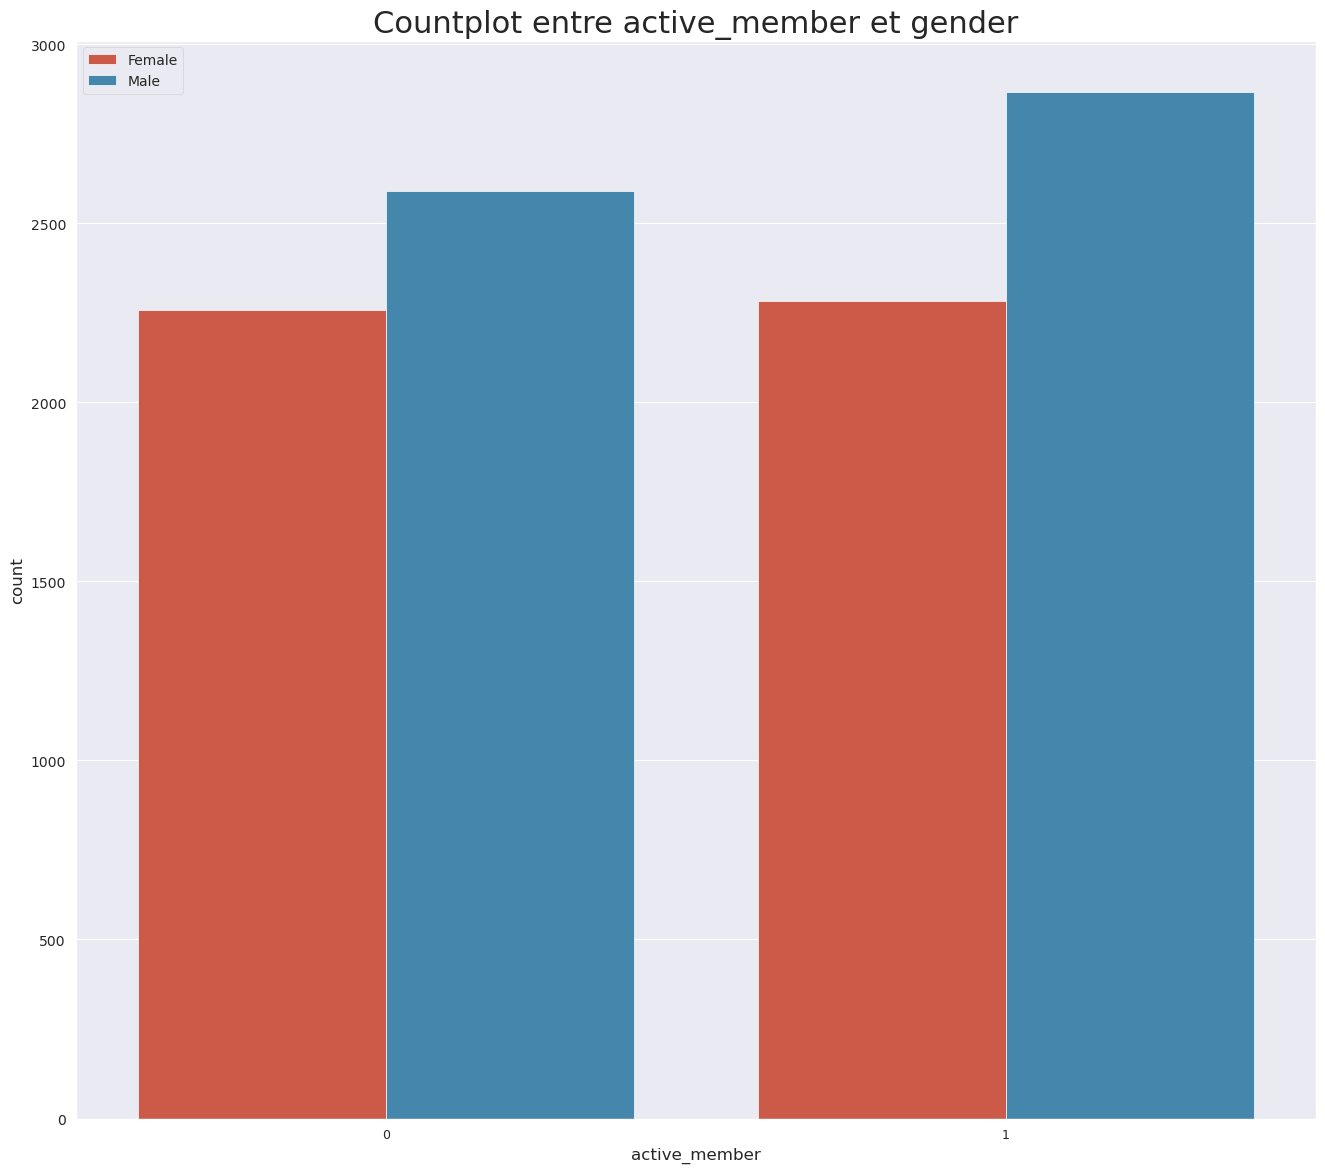

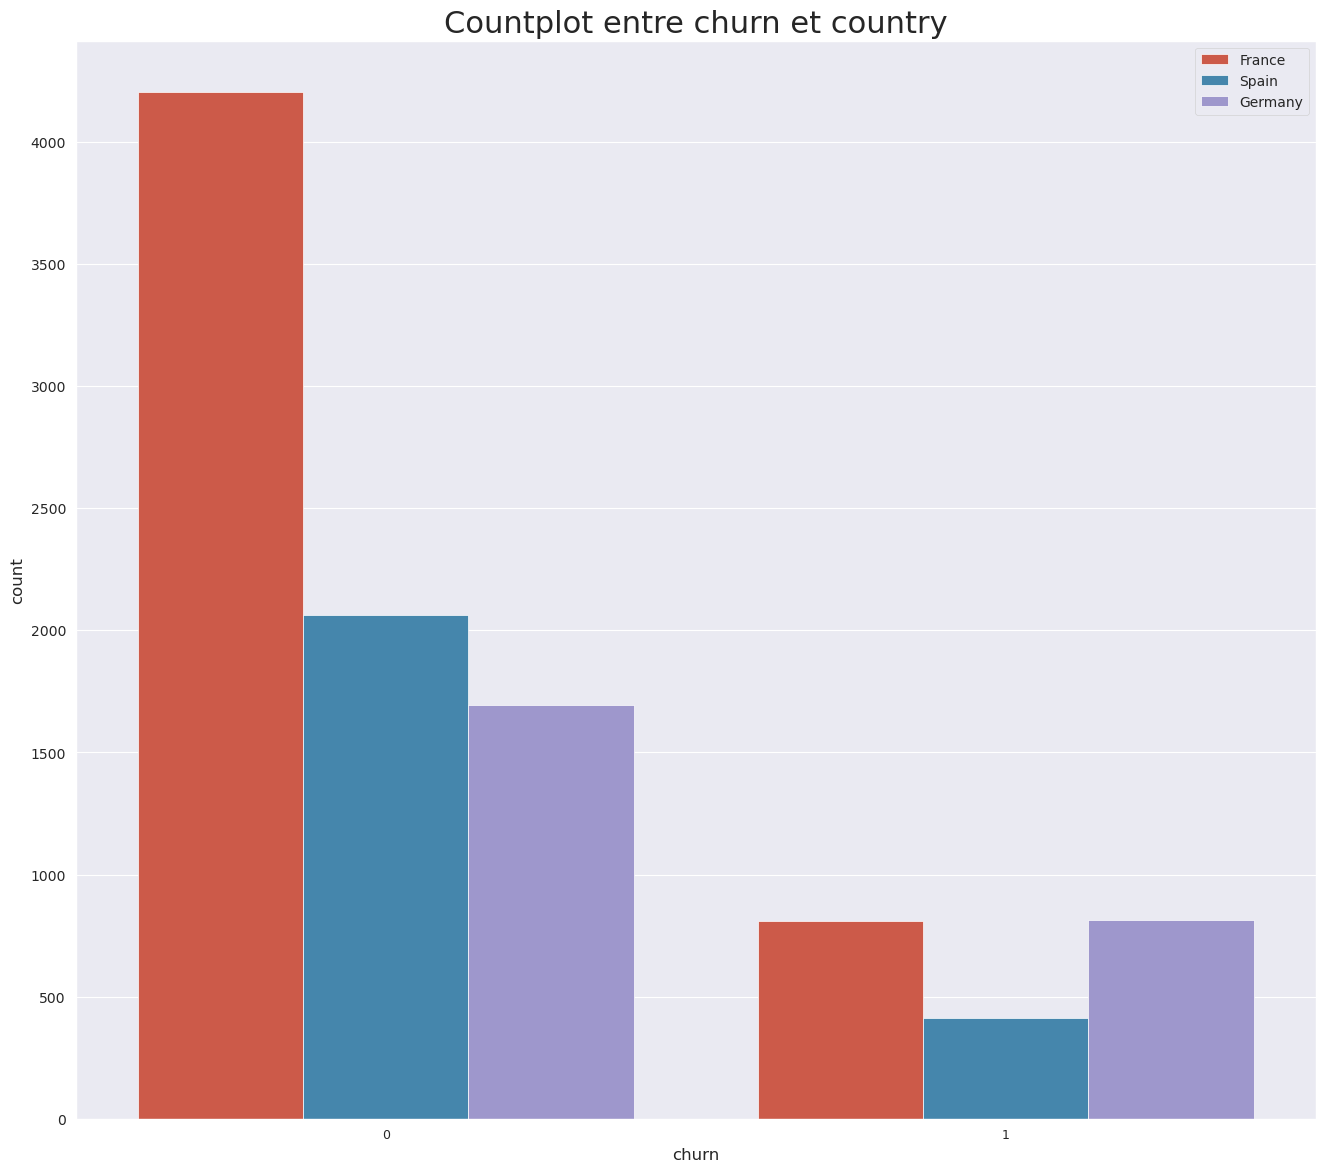

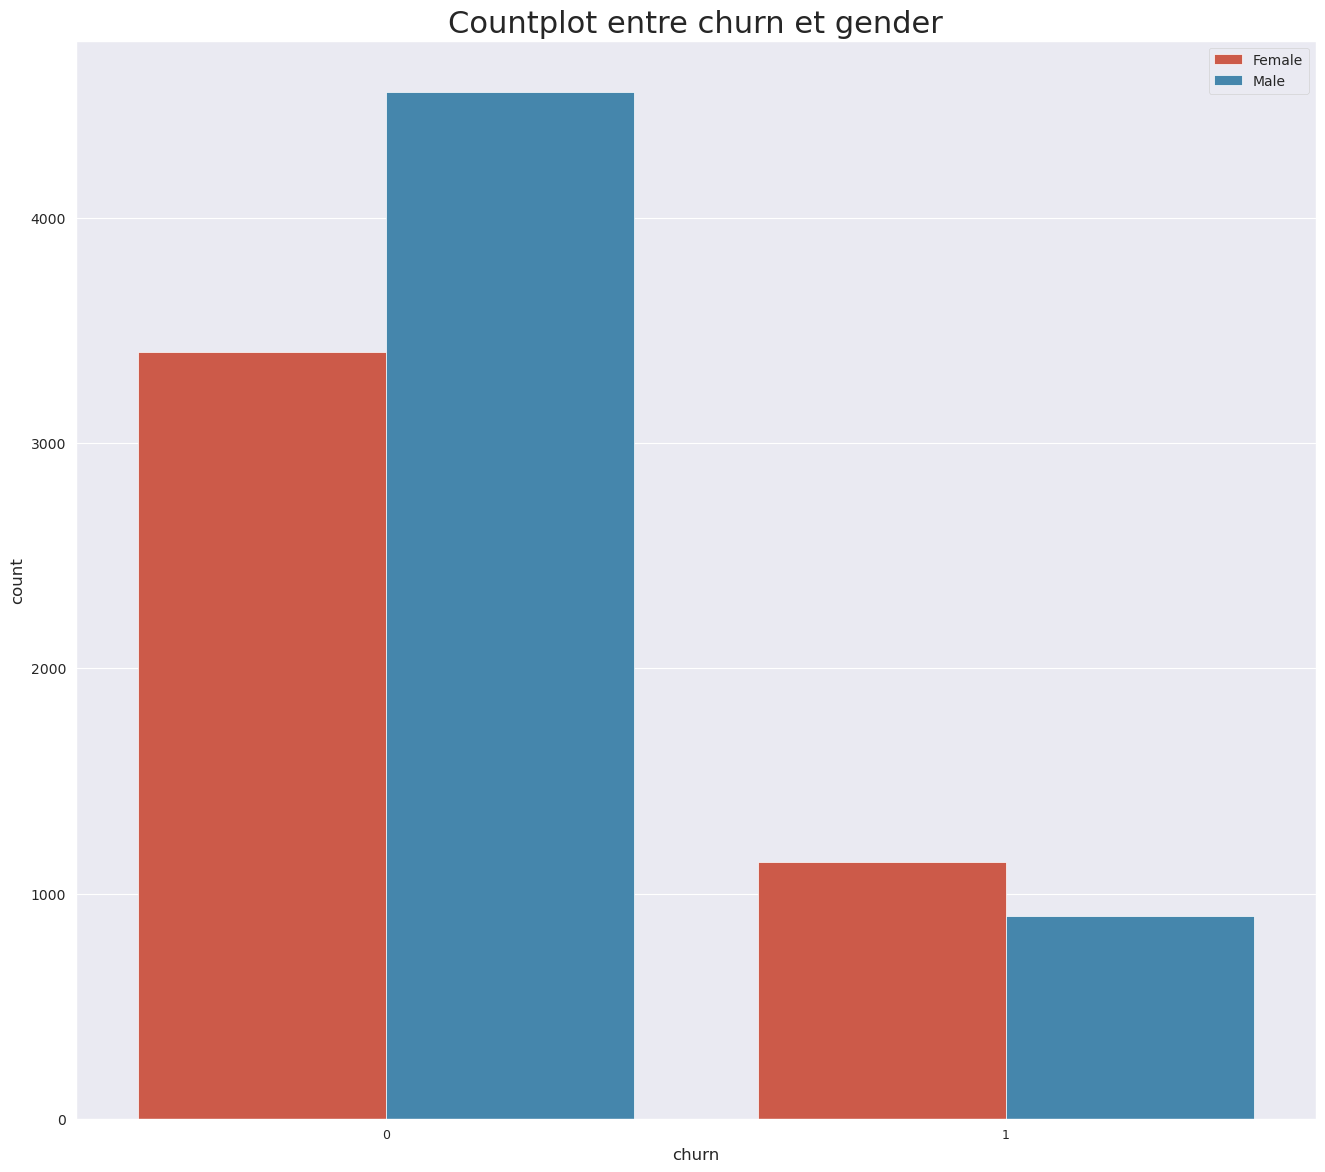

In [339]:
# boucle pour afficher combinaisons variables catégorielles différentes 
# Afficher countplot entre une variable catégorielle et variable catégorielle qui prend le nom de la colonne pour l’encodage des couleurs (hue)
for i in li_discret:
  for j in li_cat:
    if i!=j :
        exploration_Bivariate.categVScateg_countplot(i,j)

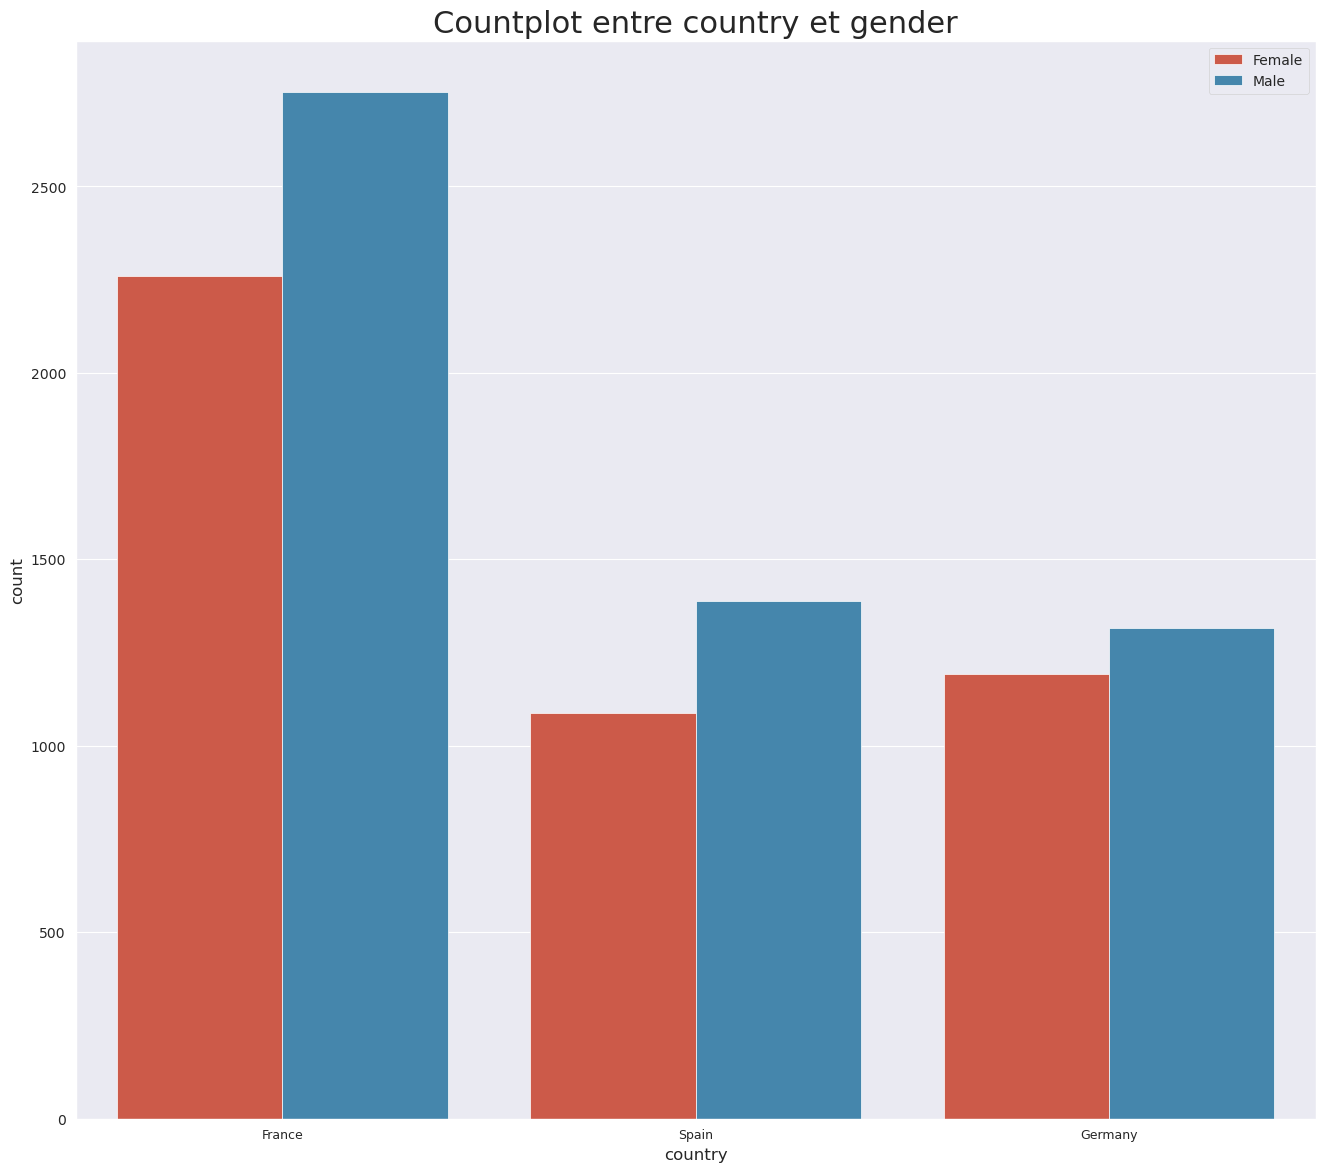

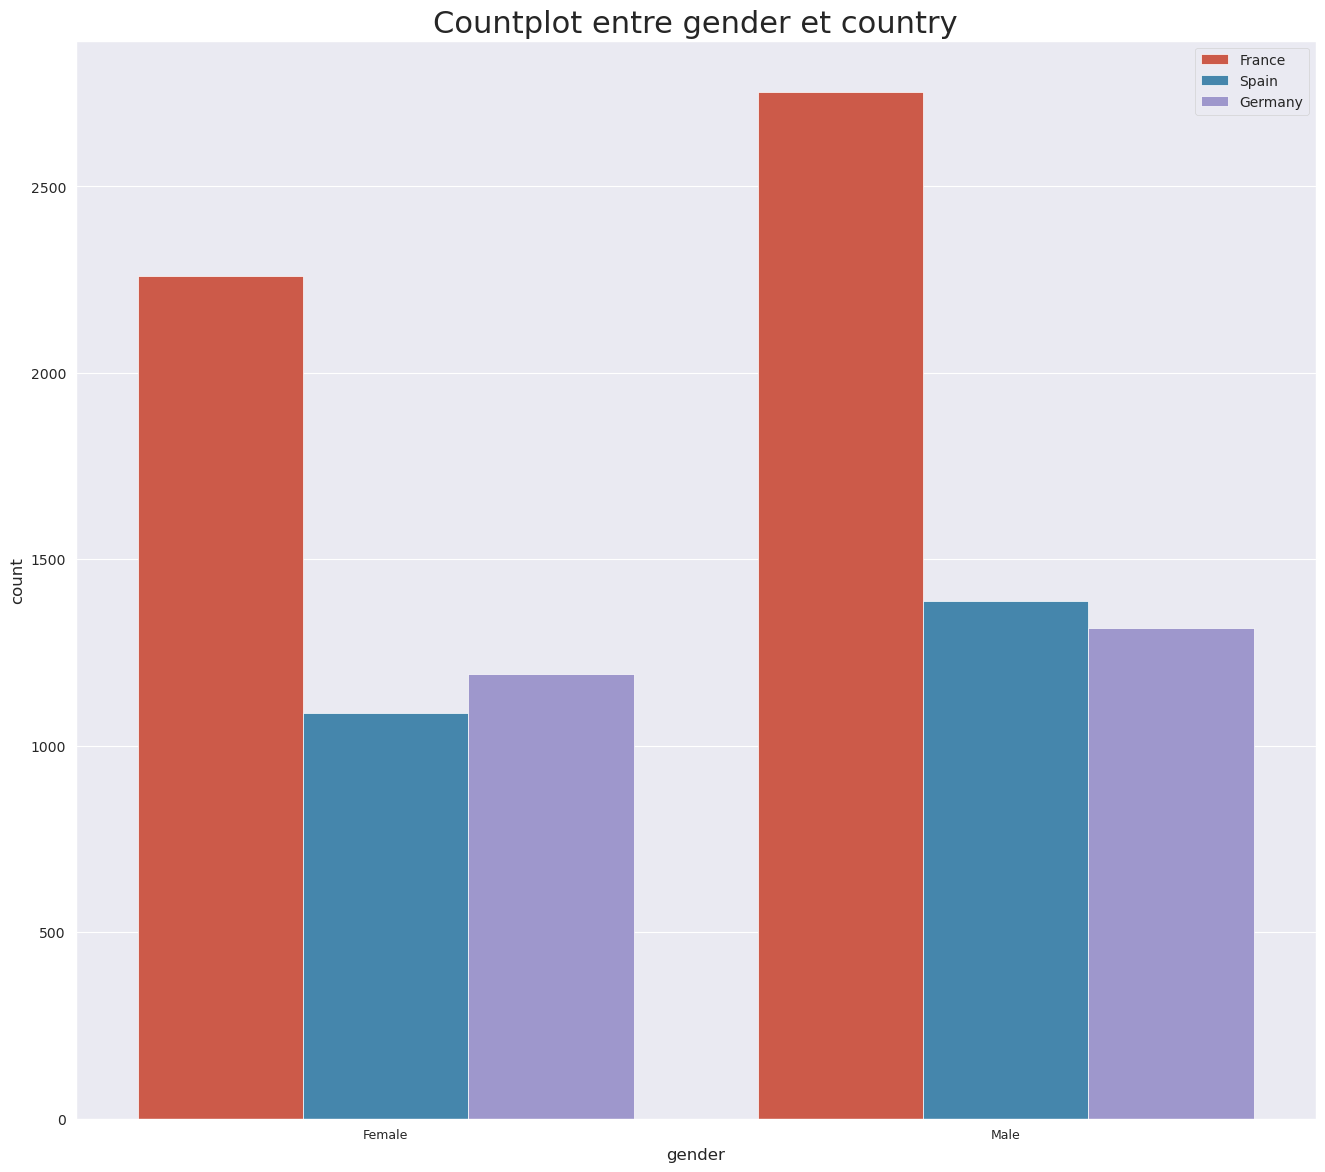

In [326]:
# boucle pour afficher combinaisons variables catégorielles différentes 
# Afficher countplot entre une variable catégorielle et variable catégorielle qui prend le nom de la colonne pour l’encodage des couleurs (hue)
for i in li_cat:
  for j in li_cat:
    if i!=j :
        exploration_Bivariate.categVScateg_countplot(i,j)